# Transcriptome
## Define functions for preprocessing
- **changeshapeDF_Fastingmice()**：Log(X+1) processing, zscore in the sample direction, and creation of mean standard error data for each WT/OB time point
- **ScreenData_Fastingmice()**：Screening with reference to ANOVA results
- **ScreenData_Fastingmice_EdgeR()**：Screening with reference to t-test results
- **DelNaN()**：missing values processing

In [8]:
import numpy as np
import pandas as pd

def changeshapeDF_Fastingmice(DF):
    def mkZscore(DF,IndLabel,ColLabel,axis):
        if axis=='col':##zscore in column direction
            ax=0
        else:##zscore in row direction
            ax=1
        meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
        stdNP = np.nanstd(np.array(DF),axis=ax)
        ZscoredDF = pd.DataFrame(index=IndLabel,columns=ColLabel)
        if axis=='col':
            for i in range(len(ColLabel)): 
                ZscoredNP = meanNP[:,i]/stdNP[i]
                ZscoredDF[ColLabel[i]] = ZscoredNP  
        else:    
            for i in range(len(IndLabel)): 
                ZscoredNP = meanNP[i,:]/stdNP[i]
                ZscoredDF.loc[IndLabel[i]] = ZscoredNP
        return(ZscoredDF) 
    timepoint=[0,2,4,6,8,12,16,24]
    condition=['WT','OB']
    #DF = DF[DF.max(axis=1)>5] ##old Threshold
    NewDF = pd.DataFrame(np.array(mkZscore(np.log(DF+1),list(DF.index),list(DF.columns),'row').fillna(0)) )  
    NewDF.index=list(DF.index); NewDF.columns=list(DF.columns)

    ##Organize by label
    Dict=dict() 
    for i in range(len(timepoint)*len(condition)):
        Dict[i] = DF.iloc[:,0+(5*i):5+(5*i)]
        if i==0:
            WT_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            WT_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        elif i<len(timepoint):
            WT_MeanStack = pd.concat( [WT_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            WT_SemStack = pd.concat( [WT_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)
        elif i == len(timepoint):
            OB_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            OB_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        else:
            OB_MeanStack = pd.concat( [OB_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            OB_SemStack = pd.concat( [OB_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)

    WTOBHstack_mean = np.hstack([WT_MeanStack,OB_MeanStack])  
    WTOBHstack_sem = np.hstack([WT_SemStack,OB_SemStack])  


    return(NewDF,DF,WTOBHstack_mean,WTOBHstack_sem)

def ScreenData_Fastingmice(DF,file_dir):
    ObDF = pd.read_excel(file_dir+'/result-edgeR/result-obob_onewayAnovaLike.xlsx',header=0,index_col=0)     
    WtDF = pd.read_excel(file_dir+'/result-edgeR/result-WT_onewayAnovaLike.xlsx',header=0,index_col=0)     
    qval = 0.1
    ObList=list(ObDF[ObDF['FDR']<qval].index)
    WtList=list(WtDF[WtDF['FDR']<qval].index)

    CombList=list(set(ObList)|set(WtList))

    return(DF.loc[CombList])

def ScreenData_Fastingmice_EdgeR(DF,file_dir):
    Ob02DF = pd.read_excel(file_dir+'./result-edgeR/obob_0h_vs_obob_2h_DEG.xlsx',header=0,index_col=0)     
    Ob04DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_4h_DEG.xlsx',header=0,index_col=0)     
    Ob06DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_6h_DEG.xlsx',header=0,index_col=0)     
    Ob08DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_8h_DEG.xlsx',header=0,index_col=0)     
    Ob012DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_12h_DEG.xlsx',header=0,index_col=0)     
    Ob016DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_16h_DEG.xlsx',header=0,index_col=0)     
    Ob024DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_24h_DEG.xlsx',header=0,index_col=0)     

    Wt02DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_2h_DEG.xlsx',header=0,index_col=0)     
    Wt04DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_4h_DEG.xlsx',header=0,index_col=0)     
    Wt06DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_6h_DEG.xlsx',header=0,index_col=0)     
    Wt08DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_8h_DEG.xlsx',header=0,index_col=0)     
    Wt012DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_12h_DEG.xlsx',header=0,index_col=0)     
    Wt016DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_16h_DEG.xlsx',header=0,index_col=0)     
    Wt024DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_24h_DEG.xlsx',header=0,index_col=0)     
    qval = 0.1
    ObList=list(Ob02DF[Ob02DF['FDR']<qval].index)+list(Ob04DF[Ob04DF['FDR']<qval].index)+list(Ob06DF[Ob06DF['FDR']<qval].index)+list(Ob08DF[Ob08DF['FDR']<qval].index)+list(Ob012DF[Ob012DF['FDR']<qval].index)+list(Ob016DF[Ob016DF['FDR']<qval].index)+list(Ob024DF[Ob024DF['FDR']<qval].index)
    WtList=list(Wt02DF[Wt02DF['FDR']<qval].index)+list(Wt04DF[Wt04DF['FDR']<qval].index)+list(Wt06DF[Wt06DF['FDR']<qval].index)+list(Wt08DF[Wt08DF['FDR']<qval].index)+list(Wt012DF[Wt012DF['FDR']<qval].index)+list(Wt016DF[Wt016DF['FDR']<qval].index)+list(Wt024DF[Wt024DF['FDR']<qval].index)

    CombList=list(set(ObList)|set(WtList))

    return(DF.loc[CombList])

def DelNaN(DF,howidx):
    MolName = list(DF['Name'])
    DF=DF.drop(['Name'],axis=1)
    MolNameDict = {key: val for key, val in zip(list(DF.index), MolName)}
    if howidx=='None':
        pass
    else:
        DF = DF.dropna(how=howidx,axis=0)
    return(DF, MolNameDict)

In [9]:
from os.path import join
file_dir = join('../','Data/timecourse_fasting/')

## Load data

In [18]:
    import ICAHelper as ICAHel 
    import AnalHelper as AnalHel
    import matplotlib.pyplot as plt

   
    ICAClss = ICAHel.ICA_class()
    AnalClss = AnalHel.Anal_class()

    
    LiverDF = pd.read_excel(file_dir+'/fasting-transcriptome-FPKM.xlsx',header=0,index_col=0)
    LiverDF = LiverDF.drop('organ',axis=0)
    ForLabel = LiverDF.iloc[[0,1],1:]
    LiverDF = LiverDF.drop(['genotype','timepoint'],axis=0)    

In [19]:
LiverDF

,Name,S25,S26,S27,S67,S68,S31,S32,S72,S73,...,S95,S96,S99,S100,S101,S58,S59,S60,S63,S64
Ensembl ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,Gnai3,28.53,29.97,25.76,31.03,27.73,25.12,27.01,28.52,30.55,...,27.04,26.79,28.11,27.17,25.48,23.78,29.51,26.27,27.03,27.96
ENSMUSG00000000003,Pbsn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000028,Cdc45,0.44,0.28,0.4,0.79,0.67,0.87,0.92,1.02,1.29,...,0.42,0.43,0.47,0.74,0.43,1.06,0.81,1.84,0.52,0.8
ENSMUSG00000000031,H19,2.62,1.9,0.68,2.88,1.45,0.84,1.45,0.98,2.64,...,0.51,0.6,1.89,1.33,1.11,0.42,0.45,0.3,0.92,0.31
ENSMUSG00000000037,Scml2,NaN,NaN,0.05,NaN,NaN,NaN,0.03,NaN,NaN,...,NaN,NaN,NaN,NaN,0.13,NaN,0.07,NaN,0.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118484,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118485,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118486,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data  preprocessing

In [20]:
    #LiverDF = ScreenData_Fastingmice(LiverDF,file_dir)
    LiverDF =ScreenData_Fastingmice_EdgeR(LiverDF,file_dir)

    LiverNewDF, BloodDict = DelNaN(LiverDF,'any') ##delete missing values
    LiverNewDF.columns=[str(i) +'_' +str(j) for i, j in zip(ForLabel.loc['genotype'],ForLabel.loc['timepoint'])]

    LiverNewDF=LiverNewDF.astype(float)
    NormalizedLiverDF,RawDF,WTOBHstack_mean,WTOBHstack_sem= changeshapeDF_Fastingmice(LiverNewDF)
    #NormalizedLiverDF,RawDF= changeshapeDF_Fastingmice_MoritaNmrz(LiverNewDF)
    #NormalizedLiverDF.to_excel(save_dir+'NormalizedLiver_FastingDF.xlsx')
    
    WTOBDF_mean=pd.DataFrame(WTOBHstack_mean);WTOBDF_mean.index=list(NormalizedLiverDF.index)
    WTOBDF_sem=pd.DataFrame(WTOBHstack_sem);WTOBDF_sem.index=list(NormalizedLiverDF.index)
    OptionDict={};OptionDict['std']=WTOBDF_sem

    NormalizedLiverDF   

,WT_0,WT_0,WT_0,WT_0,WT_0,WT_2,WT_2,WT_2,WT_2,WT_2,...,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24
ENSMUSG00000008140,-0.002952,0.850643,1.294580,-0.889406,1.763878,0.997142,-0.424387,0.379583,-0.951434,1.223087,...,-0.271841,-0.525551,0.468095,1.018351,-0.189997,-0.961477,-1.863309,-0.107020,-1.947700,-0.971531
ENSMUSG00000034738,0.877910,1.674570,0.815049,1.476293,2.117684,0.534059,0.575260,0.611012,0.418830,0.600825,...,0.455806,0.054865,-0.371519,1.193496,0.873105,0.201679,0.402892,-0.049574,-0.939702,0.106213
ENSMUSG00000026812,1.074587,1.688409,0.394768,-0.469025,-1.696670,0.235639,0.703961,1.260825,-0.227274,-0.736293,...,-0.975267,-1.087981,-0.539440,0.839344,0.106051,-2.974884,-0.278475,1.089066,-1.031428,-0.809077
ENSMUSG00000005034,0.572014,0.549792,-0.318948,0.812478,-0.208127,-0.008846,-0.318948,-0.381184,-0.208127,-0.281837,...,0.493967,0.914127,0.599706,0.643814,0.594175,0.704069,1.669531,0.488362,0.115439,2.230095
ENSMUSG00000024601,0.369309,0.512757,0.028064,0.303833,0.280848,-0.398669,0.137610,0.074890,0.238905,0.128700,...,0.150945,0.625310,0.489374,0.421334,0.312425,0.217066,0.949203,0.728730,-0.171850,0.754893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000060935,-0.784956,-1.299929,-0.943152,0.335182,-2.175602,-0.579927,-0.630573,0.879861,1.193397,-0.024582,...,0.269247,-0.863566,1.250514,-1.078033,-0.943152,-1.271768,0.135306,1.492302,-0.656046,-0.916513
ENSMUSG00000051355,0.923482,0.456853,0.704903,0.698948,0.356265,-0.199344,1.072420,1.535989,1.187837,-0.036897,...,0.321918,0.263800,-0.663880,1.455488,-0.319233,-0.454884,-0.094517,0.162216,-0.771467,-0.893427
ENSMUSG00000053329,1.043776,0.539287,2.335244,-0.867237,1.353123,0.756871,0.235870,-0.230111,-0.862903,0.326514,...,0.128252,1.189782,-0.054838,0.072303,-0.609297,1.906463,0.325782,1.403599,0.352825,0.531467
ENSMUSG00000030062,1.859921,1.218864,0.389534,2.505189,1.438460,2.434279,1.616078,1.236694,1.340730,1.243249,...,-1.258039,-2.220103,-0.502969,-1.737441,-1.819652,-0.836709,-1.879299,-0.386305,0.400320,-0.797084


## Perform ICA

80 100
Getting 80 ICs * 100 times in parallel.
Calculating distances b/w ICs.
DBSCAN identified 16 clusters of ICs.
Orthogonality of ICs is 100.0 %


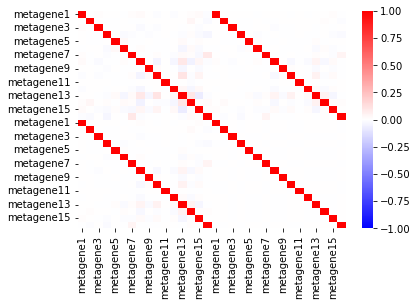

In [7]:
    # Repeat ICA (parallelization)
    num_of_rep = 100
    #Number of independent components
    k =80#100
    W,S = ICAClss.robust_ica(NormalizedLiverDF,k, num_of_rep)

   ## Calculate metasample, sort independent components by explanatory ratio


In [13]:
    metagenes, metasamples, ICAexplain = ICAClss.ICAsort(NormalizedLiverDF, W, S)
    #metagenes.to_excel(save_dir+'MolScore.xlsx')
    #metasamples.to_excel(save_dir+'SampleScore.xlsx')     

35.92% data explained by 80 metagenes


 ## Display the explanation rate up to the calculated IC

In [211]:
    print("{:.2%}".format(sum(ICAexplain)) + " data explained by " + str(k) + " metagenes")
    fig = plt.figure(figsize=(10,8))
    ICAClss.plotPCACovRatio(ICAexplain)
    plt.xticks(size='10',rotation=270);plt.yticks(size='40')

35.92% data explained by 80 metagenes


  ## Module detection and enrichment analysis using each independent component


In [209]:
    qvalcutoff=0.1
    modules = AnalClss.metagenes_topBH(metagenes, qvalcutoff, BloodDict,WTOBDF_mean, OptionDict)

error_1KEGG_2019_Mouse
error_1TRANSFAC_and_JASPAR_PWMs
error_1MSigDB_Computational
error_1Disease_Perturbations_from_GEO_down
error_1Disease_Perturbations_from_GEO_up
error_1GO_Biological_Process_2021
                            Term   P-value  Odds Ratio  Combined Score  \
Index                                                                    
1       Phenylalanine metabolism  0.006881  181.563636      904.004600   
2            Tyrosine metabolism  0.011942  102.333333      453.104671   
3          Tryptophan metabolism  0.014316   84.880851      360.438930   
4              Cocaine addiction  0.014316   84.880851      360.438930   
5         Fanconi anemia pathway  0.015205   79.776000      333.955136   
6          Amphetamine addiction  0.020230   59.483582      232.021751   
7             Insulin resistance  0.032553   36.486239      124.960769   
8           Serotonergic synapse  0.038957   30.325191       98.414323   
9           Dopaminergic synapse  0.039827   29.641791     

                                                    Term   P-value  \
Index                                                                
1      catechol-containing compound biosynthetic proc...  0.001499   
2               serotonin metabolic process (GO:0042428)  0.001499   
3      cell fate commitment involved in formation of ...  0.001499   
4      indolalkylamine biosynthetic process (GO:0046219)  0.001499   
5      indole-containing compound biosynthetic proces...  0.001499   
6         indolalkylamine metabolic process (GO:0006586)  0.001799   
7      phenol-containing compound biosynthetic proces...  0.002697   
8      regulation of glucan biosynthetic process (GO:...  0.002697   
9           endodermal cell fate commitment (GO:0001711)  0.002997   
10               histone H2B ubiquitination (GO:0033523)  0.002997   
11     positive regulation of mRNA 3'-end processing ...  0.002997   
12     positive regulation of transcription elongatio...  0.003296   
13     regulation of

                                               Term   P-value  Odds Ratio  \
Index                                                                       
1                             Arginine biosynthesis  0.000115  156.596078   
2       Alanine, aspartate and glutamate metabolism  0.000445   75.992381   
3          Glycine, serine and threonine metabolism  0.000520   69.982456   
4                Cysteine and methionine metabolism  0.000813   55.375000   
5                         Selenocompound metabolism  0.014358   77.996094   
6                         One carbon pool by folate  0.016034   69.322917   
7           Proximal tubule bicarbonate reclamation  0.018544   59.410714   
8                 Ascorbate and aldarate metabolism  0.022713   47.973558   
9           Glyoxylate and dicarboxylate metabolism  0.026036   41.568750   
10                        Pentose phosphate pathway  0.026865   40.225806   
11                        Citrate cycle (TCA cycle)  0.026865   40.225806   

             Term   P-value  Odds Ratio  Combined Score  \
Index                                                     
1        GNF2 HPN  0.000004   47.355993      586.749374   
2       MODULE 23  0.000083   14.451637      135.882892   
3        GNF2 TST  0.000088   42.182461      393.867302   
4      MODULE 349  0.000092  177.493333     1649.979969   
5      GNF2 GSTM1  0.000101   40.182615      369.585221   
...           ...       ...         ...             ...   
98      MODULE 60  0.306005    2.883107        3.414043   
99      MODULE 52  0.310813    2.828559        3.305353   
100     MODULE 18  0.321516    2.712917        3.078367   
101     MODULE 16  0.356075    2.386397        2.464228   
102     MODULE 45  0.395358    2.083441        1.933355   

                                  Genes  Adjusted P-value  Old P-value  \
Index                                                                    
1           [ALDH1L1, NNMT, ASS1, GNMT]          0.000424            0   
2      [AL

                                                    Term   P-value  \
Index                                                                
1             regulation of gluconeogenesis (GO:0006111)  0.000002   
2        alpha-amino acid metabolic process (GO:1901605)  0.000008   
3       dicarboxylic acid metabolic process (GO:0043648)  0.000015   
4      regulation of carbohydrate biosynthetic proces...  0.000030   
5                                urea cycle (GO:0000050)  0.000030   
...                                                  ...       ...   
157    negative regulation of cellular process (GO:00...  0.386292   
158    negative regulation of transcription by RNA po...  0.446678   
159         regulation of apoptotic process (GO:0042981)  0.474265   
160    negative regulation of transcription, DNA-temp...  0.562142   
161    regulation of transcription by RNA polymerase ...  0.862982   

       Odds Ratio  Combined Score                  Genes  Adjusted P-value  \
Index      

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1       FOXJ1 (human)  0.016689    3.908891       15.999055   
2        UBTF (human)  0.017096    3.883359       15.801023   
3         SP4 (human)  0.043207   24.314634       76.390549   
4      SREBF2 (human)  0.050459    3.228922        9.643480   
5       APEX1 (human)  0.051835    3.198556        9.466748   
...               ...       ...         ...             ...   
176     CBEPB (human)  0.946262    0.334655        0.018485   
177     STAT3 (human)  0.955795    0.312201        0.014115   
178       JUN (human)  0.966124    0.285782        0.009849   
179     GATA2 (human)  0.996340    0.313095        0.001148   
180     FOXC1 (human)  0.999892    0.208374        0.000023   

                                             Genes  Adjusted P-value  \
Index                                                                  
1              [HADHB, FABP2, NCEH1,

                                                    Term       P-value  \
Index                                                                    
1                 fatty acid beta-oxidation (GO:0006635)  5.962220e-14   
2              fatty acid catabolic process (GO:0009062)  5.284038e-13   
3                      fatty acid oxidation (GO:0019395)  3.686242e-09   
4      fatty acid beta-oxidation using acyl-CoA oxida...  4.502209e-07   
5         cardiolipin acyl-chain remodeling (GO:0035965)  2.198015e-05   
...                                                  ...           ...   
136    negative regulation of cellular macromolecule ...  4.415805e-01   
137    negative regulation of transcription by RNA po...  5.186397e-01   
138    negative regulation of transcription, DNA-temp...  6.395077e-01   
139    regulation of transcription by RNA polymerase ...  6.905260e-01   
140    regulation of transcription, DNA-templated (GO...  6.999703e-01   

       Odds Ratio  Combined Score  \


                                                    Term       P-value  \
Index                                                                    
1      Obstructive sleep apnea C0520679 mouse GSE1873...  1.719552e-13   
2      Alcoholic Hepatitis DOID-12351 human GSE28619 ...  3.663454e-10   
3      RA (rheumatoid arthritis) C0003873 human GSE19...  2.750726e-08   
4       Wilson disease DOID-893 mouse GSE5348 sample 966  9.000463e-07   
5      Idiopathic fibrosing alveolitis C0085786 human...  6.267402e-06   
...                                                  ...           ...   
644    multiple sclerosis DOID-2377 human GSE16461 sa...  8.839613e-01   
645    Crohn's disease DOID-8778 human GSE1710 sample...  8.888886e-01   
646    amyotrophic lateral sclerosis DOID-332 mouse G...  8.894231e-01   
647    autism spectrum disorder DOID-0060041 human GS...  8.946305e-01   
648    Nicotine addiction C0028043 human GSE11208 sam...  9.066113e-01   

       Odds Ratio  Combined Score  \


                                                    Term   P-value  \
Index                                                                
1            Protein processing in endoplasmic reticulum  0.000009   
2                                            Spliceosome  0.000081   
3                    Antigen processing and presentation  0.000520   
4                             Estrogen signaling pathway  0.001645   
5                                            Influenza A  0.003128   
6                                          Legionellosis  0.004625   
7                                            Endocytosis  0.011464   
8                           Longevity regulating pathway  0.013735   
9                                          Toxoplasmosis  0.015307   
10                                               Measles  0.026229   
11                               Hippo signaling pathway  0.031483   
12                                           Necroptosis  0.037896   
13                  

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1         JUN (mouse)  0.002087    3.743173       23.103252   
2        TCF4 (human)  0.008362    2.505402       11.985887   
3       PITX2 (human)  0.013523    2.440867       10.504006   
4      ZNF281 (human)  0.027405    3.225280       11.601396   
5       HINFP (human)  0.032014    2.229569        7.673247   
...               ...       ...         ...             ...   
205    ARID3A (mouse)  0.969292    0.280951        0.008763   
206     FOXC1 (human)  0.972748    0.551921        0.015250   
207       JUN (human)  0.974764    0.346253        0.008850   
208     CBEPB (mouse)  0.985033    0.309085        0.004661   
209     FOXL1 (human)  0.986580    0.412029        0.005567   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [CNOT4, HSP90AB1,

                                                    Term       P-value  \
Index                                                                    
1              response to unfolded protein (GO:0006986)  2.161756e-12   
2      negative regulation of transcription from RNA ...  1.637276e-09   
3      regulation of cellular response to heat (GO:19...  4.637510e-09   
4      regulation of cellular response to stress (GO:...  5.237049e-08   
5      chaperone cofactor-dependent protein refolding...  1.142755e-07   
...                                                  ...           ...   
420    transmembrane receptor protein tyrosine kinase...  5.107350e-01   
421            regulation of cell migration (GO:0030334)  5.142214e-01   
422    regulation of transcription, DNA-templated (GO...  5.633123e-01   
423    positive regulation of nucleic acid-templated ...  5.961256e-01   
424    positive regulation of cellular process (GO:00...  6.711530e-01   

       Odds Ratio  Combined Score  \


              Term       P-value  Odds Ratio  Combined Score  \
Index                                                          
1       MORF HDAC1  2.669956e-09   13.921168      274.820611   
2      MORF PAPSS1  2.168683e-06   18.151030      236.714668   
3         GNF2 DEK  2.541724e-06   26.781671      345.019376   
4      MORF EIF3S6  6.199249e-06   14.979206      179.616895   
5         GNF2 TDG  8.743335e-06   36.154475      421.099087   
...            ...           ...         ...             ...   
252      MODULE 69  8.681124e-01    0.493561        0.069806   
253      MODULE 11  8.721234e-01    0.486035        0.066501   
254     MODULE 100  8.740835e-01    0.482355        0.064915   
255     MODULE 137  8.750524e-01    0.480536        0.064138   
256      MODULE 66  8.779153e-01    0.475156        0.061868   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [EID

                                                    Term   P-value  \
Index                                                                
1             dendritic spine morphogenesis (GO:0060997)  0.001609   
2         mitotic sister chromatid cohesion (GO:0007064)  0.001609   
3      N-terminal protein amino acid acetylation (GO:...  0.001609   
4      mitochondrial electron transport, cytochrome c...  0.001819   
5          aerobic electron transport chain (GO:0019646)  0.002315   
...                                                  ...       ...   
567    positive regulation of intracellular signal tr...  0.875052   
568    negative regulation of cellular process (GO:00...  0.884346   
569     cytokine-mediated signaling pathway (GO:0019221)  0.906530   
570           regulation of gene expression (GO:0010468)  0.984506   
571    regulation of transcription, DNA-templated (GO...  0.992788   

       Odds Ratio  Combined Score                    Genes  Adjusted P-value  \
Index    

                   Term   P-value  Odds Ratio  Combined Score  \
Index                                                           
1         PRDM1 (human)  0.002473    2.506973       15.047195   
2           SRF (human)  0.004421    1.946376       10.552044   
3          NFYA (human)  0.009727    1.935854        8.968542   
4        ZBTB16 (human)  0.011350    2.141557        9.591015   
5         CREB1 (human)  0.021080    1.773337        6.844113   
...                 ...       ...         ...             ...   
236    MZF1 1-4 (human)  0.998967    0.292918        0.000303   
237       FOXC1 (human)  0.999000    0.531796        0.000532   
238       TEAD2 (mouse)  0.999477    0.128015        0.000067   
239        JUND (mouse)  0.999777    0.114363        0.000025   
240         SRF (mouse)  0.999796    0.113095        0.000023   

                                                   Genes  Adjusted P-value  \
Index                                                                       

                                                    Term       P-value  \
Index                                                                    
1      IRE1-mediated unfolded protein response (GO:00...  1.191287e-21   
2      protein exit from endoplasmic reticulum (GO:00...  6.879512e-16   
3      response to endoplasmic reticulum stress (GO:0...  2.725159e-15   
4      endoplasmic reticulum to Golgi vesicle-mediate...  5.195378e-15   
5                         protein transport (GO:0015031)  1.131602e-10   
...                                                  ...           ...   
567    positive regulation of transcription by RNA po...  9.855598e-01   
568           regulation of gene expression (GO:0010468)  9.936429e-01   
569    positive regulation of transcription, DNA-temp...  9.961538e-01   
570    regulation of transcription by RNA polymerase ...  9.982174e-01   
571    regulation of transcription, DNA-templated (GO...  9.999775e-01   

       Odds Ratio  Combined Score  \


              Term   P-value  Odds Ratio  Combined Score  \
Index                                                      
1        GNF2 NPM1  0.000137   34.613913      307.814900   
2        GNF2 MBD4  0.000556   66.719064      500.063177   
3      MORF EIF3S6  0.000634   20.190508      148.684869   
4      GNF2 EIF3S6  0.000634   20.190508      148.684869   
5      MORF EIF4A2  0.000909   17.765373      124.420753   
...            ...       ...         ...             ...   
158      MODULE 84  0.541538    1.312787        0.805187   
159      MODULE 66  0.543515    1.305438        0.795922   
160      MODULE 23  0.551988    1.274494        0.757341   
161      MODULE 55  0.696831    0.850963        0.307379   
162      MODULE 88  0.698598    0.846719        0.303700   

                       Genes  Adjusted P-value  Old P-value  \
Index                                                         
1       [SSB, SERBP1, EIF3E]          0.022254            0   
2              [JUND, RPL22]  

                                          Term   P-value  Odds Ratio  \
Index                                                                  
1                    Pentose phosphate pathway  0.000058   46.843260   
2                      HIF-1 signaling pathway  0.000104   18.467907   
3                 Glycolysis / Gluconeogenesis  0.000524   21.188565   
4              Fructose and mannose metabolism  0.003061   26.828283   
5                                    Autophagy  0.003531   10.643880   
...                                        ...       ...         ...   
64                       Ras signaling pathway  0.423858    1.847920   
65                                 Endocytosis  0.471217    1.596772   
66                      MAPK signaling pathway  0.501840    1.458673   
67     Neuroactive ligand-receptor interaction  0.562183    1.228292   
68                  PI3K-Akt signaling pathway  0.571519    1.196690   

       Combined Score                           Genes  Adjusted

                                                    Term   P-value  \
Index                                                                
1               Hypoxia C0242184 mouse GSE3195 sample 70  0.000003   
2      Vitamin A Deficiency C0042842 rat GSE1600 samp...  0.000383   
3      Familial hypophosphataemic rickets C0733682 mo...  0.000461   
4      Leukemia, Acute Megakaryocytic C0023462 mouse ...  0.000508   
5      acute myocardial infarction DOID-9408 mouse GS...  0.000510   
...                                                  ...       ...   
547    Down syndrome DOID-14250 mouse GSE39159 sample...  0.707692   
548    autistic disorder DOID-12849 human GSE6575 sam...  0.708397   
549    Purpura, Idiopathic Thrombocytopenic C0043117 ...  0.718096   
550    West Nile fever DOID-2366 human GSE30719 sampl...  0.718776   
551    acute myocarditis DOID-3951 mouse GSE35182 sam...  0.744718   

       Odds Ratio  Combined Score  \
Index                               
1       13.0015

                  Term   P-value  Odds Ratio  Combined Score  \
Index                                                          
1         ETV4 (human)  0.000259    2.462933       20.337777   
2         MZF1 (human)  0.006937    1.986974        9.877160   
3        RUNX1 (human)  0.013321    1.555905        6.719072   
4      MIR133B (human)  0.014931    1.827013        7.681281   
5         LEF1 (mouse)  0.016508    1.755426        7.204152   
...                ...       ...         ...             ...   
251      FOXL1 (human)  0.999436    0.525366        0.000297   
252       NRF1 (human)  0.999647    0.187147        0.000066   
253       NFYB (mouse)  0.999850    0.214686        0.000032   
254      CPEB1 (mouse)  0.999850    0.214686        0.000032   
255      FOXC1 (human)  0.999995    0.383820        0.000002   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [C1Q

                                                    Term       P-value  \
Index                                                                    
1      neutrophil activation involved in immune respo...  1.339103e-12   
2                  neutrophil degranulation (GO:0043312)  8.775039e-12   
3              neutrophil mediated immunity (GO:0002446)  1.163278e-11   
4                regulation of phagocytosis (GO:0050764)  1.042088e-08   
5      positive regulation of cytokine production (GO...  2.954075e-08   
...                                                  ...           ...   
1363                 organelle organization (GO:0006996)  9.572669e-01   
1364   negative regulation of nucleic acid-templated ...  9.694068e-01   
1365   negative regulation of transcription, DNA-temp...  9.937979e-01   
1366   regulation of transcription by RNA polymerase ...  9.993442e-01   
1367   regulation of transcription, DNA-templated (GO...  9.998636e-01   

       Odds Ratio  Combined Score  \


              Term   P-value  Odds Ratio  Combined Score                Genes  \
Index                                                                           
1       MODULE 130  0.000262  100.040100      824.992061           [C4B, C4A]   
2         GNF2 HPX  0.000366   25.059343      198.296004    [APOH, PON1, ALB]   
3         GNF2 HPN  0.008485   15.948574       76.065917         [APOH, PON1]   
4        MODULE 24  0.011336    7.232963       32.402022  [APOH, ALB, CYB561]   
5       MODULE 415  0.013568   83.195833      357.743930                [ALB]   
...            ...       ...         ...             ...                  ...   
73     MORF MAGEA9  0.365239    2.289461        2.305951             [TRIM24]   
74       MODULE 64  0.423826    1.882205        1.615745               [APOH]   
75      MODULE 100  0.439768    1.789687        1.470241                [ALB]   
76      MODULE 137  0.440977    1.782936        1.459801                [ALB]   
77       MODULE 66  0.444588

                                                    Term   P-value  \
Index                                                                
1                                  TNF signaling pathway  0.000856   
2                                     Pathways in cancer  0.001969   
3                                 Acute myeloid leukemia  0.006128   
4                                          Melanogenesis  0.012512   
5      AGE-RAGE signaling pathway in diabetic complic...  0.012752   
...                                                  ...       ...   
57                                cAMP signaling pathway  0.302954   
58                                 Ras signaling pathway  0.328845   
59                                   MicroRNAs in cancer  0.382136   
60                                MAPK signaling pathway  0.395847   
61               Neuroactive ligand-receptor interaction  0.449707   

       Odds Ratio  Combined Score                           Genes  \
Index               

                                                    Term   P-value  \
Index                                                                
1      idiopathic urticaria DOID-1555 human GSE57178 ...  0.000589   
2      PTSD - Post-traumatic stress disorder C0038436...  0.001236   
3      Waldenstrom Macroglobulinemia UMLS CUI-C002441...  0.001480   
4      glaucoma associated with systemic syndromes DO...  0.002335   
5      Diamond-Blackfan anaemia DOID-1339 human GSE14...  0.003863   
...                                                  ...       ...   
345    pancreatic ductal adenocarcinoma DOID-3498 hum...  0.567791   
346    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.569296   
347    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.579689   
348    autistic disorder DOID-12849 human GSE6575 sam...  0.589838   
349    West Nile fever DOID-2366 human GSE30719 sampl...  0.600448   

       Odds Ratio  Combined Score                             Genes  \
Index             

             Term       P-value  Odds Ratio  Combined Score  \
Index                                                         
1      MODULE 345  1.192397e-09   22.695951      466.340518   
2       MODULE 45  2.989321e-08    7.807312      135.266639   
3       MODULE 44  3.639861e-08   10.665496      182.686466   
4      MODULE 436  5.356955e-08   17.904116      299.755809   
5       MODULE 46  2.130156e-06    7.808192      101.969638   
...           ...           ...         ...             ...   
128    MODULE 179  8.350762e-01    0.555740        0.100162   
129     MODULE 37  8.369694e-01    0.552152        0.098265   
130    MODULE 136  8.490542e-01    0.529343        0.086618   
131     MODULE 69  8.681124e-01    0.493561        0.069806   
132     MODULE 41  8.843459e-01    0.463047        0.056912   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [CXCL9, RSAD2, ST

                                                    Term       P-value  \
Index                                                                    
1      cellular response to type I interferon (GO:007...  1.057020e-17   
2       type I interferon signaling pathway (GO:0060337)  1.057020e-17   
3              defense response to symbiont (GO:0140546)  1.160446e-12   
4                 defense response to virus (GO:0051607)  2.521352e-12   
5       cytokine-mediated signaling pathway (GO:0019221)  8.265411e-09   
...                                                  ...           ...   
514    positive regulation of transcription by RNA po...  8.604653e-01   
515    positive regulation of cellular process (GO:00...  9.079684e-01   
516    regulation of transcription by RNA polymerase ...  9.272227e-01   
517    regulation of transcription, DNA-templated (GO...  9.337306e-01   
518    positive regulation of transcription, DNA-temp...  9.412935e-01   

       Odds Ratio  Combined Score  \


                                                    Term       P-value  \
Index                                                                    
1      Obstructive sleep apnea C0520679 mouse GSE1873...  5.767503e-12   
2      Alcoholic Hepatitis DOID-12351 human GSE28619 ...  8.960525e-11   
3      idiopathic pulmonary fibrosis DOID-0050156 hum...  1.523568e-08   
4      HIV - Human immunodeficiency virus infection C...  9.159545e-08   
5      idiopathic pulmonary fibrosis DOID-0050156 hum...  1.102970e-07   
...                                                  ...           ...   
634           Epilepsy C0014544 human GSE7486 sample 417  7.583423e-01   
635    Dental cavity, complex C0399396 human GSE1629 ...  7.583423e-01   
636    polycystic ovary syndrome DOID-11612 human GSE...  7.693286e-01   
637         Hypertension C0020538 rat GSE2739 sample 209  7.726089e-01   
638    facioscapulohumeral muscular dystrophy DOID-11...  7.883329e-01   

       Odds Ratio  Combined Score  \


                                          Term   P-value  Odds Ratio  \
Index                                                                  
1                                     Ribosome  0.000003    7.185307   
2                                   Proteasome  0.000058   13.704268   
3                           Huntington disease  0.000065    5.614563   
4                    Oxidative phosphorylation  0.000221    6.237850   
5                       Cholesterol metabolism  0.001001    9.930446   
...                                        ...       ...         ...   
141                      Ras signaling pathway  0.881243    0.469037   
142    Human T-cell leukemia virus 1 infection  0.893658    0.445697   
143     Cytokine-cytokine receptor interaction  0.931038    0.372814   
144    Neuroactive ligand-receptor interaction  0.958893    0.311752   
145           Herpes simplex virus 1 infection  0.981309    0.249318   

       Combined Score                                          

                                                    Term       P-value  \
Index                                                                    
1      nemaline myopathy DOID-3191 mouse GSE3384 samp...  1.721576e-20   
2      acute myocardial infarction DOID-9408 mouse GS...  3.693646e-14   
3      Hepatic lipidosis C0015695 mouse GSE5538 sampl...  1.289734e-13   
4      Hepatitis, Autoimmune C0241910 mouse GSE867 sa...  4.437116e-13   
5      nemaline myopathy DOID-3191 mouse GSE3384 samp...  4.526371e-13   
...                                                  ...           ...   
781           asthma DOID-2841 human GSE27011 sample 565  9.726527e-01   
782    precursor B lymphoblastic lymphoma/leukemia DO...  9.781121e-01   
783    Psoriasis vulgaris C0263361 human GSE13355 sam...  9.785147e-01   
784    CML - Chronic myeloid leukemia C0023473 human ...  9.826483e-01   
785    pulmonary tuberculosis DOID-2957 mouse GSE4802...  9.885851e-01   

       Odds Ratio  Combined Score  \


 ## ANOVA & multiple comparison test


/Users/fujita/Dropbox/Python/Jupyter/ICA/AnalHelper.py:89: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Scheffe_qvalues_Time


,0,2,4,6,8,12,16,24
metasample1_0,1.000000,1.000000,0.102023,0.010268,0.000447,0.006139,0.004156,0.3018
metasample1_2,1.000000,1.000000,0.820082,0.165588,0.014115,0.118335,0.092774,1.0000
metasample1_4,0.102023,0.820082,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample1_6,0.010268,0.165588,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample1_8,0.000447,0.014115,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
...,...,...,...,...,...,...,...,...
metasample14_6,0.878862,0.132769,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_8,1.000000,0.278226,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


Scheffe_qvalues_WTOB


,WT,OB
metasample1_WT,1.000000e+00,2.232189e-08
metasample1_OB,2.232189e-08,1.000000e+00
metasample2_WT,1.000000e+00,9.719357e-01
metasample2_OB,9.719357e-01,1.000000e+00
metasample5_WT,1.000000e+00,6.164005e-02
metasample5_OB,6.164005e-02,1.000000e+00
metasample7_WT,1.000000e+00,2.298065e-01
metasample7_OB,2.298065e-01,1.000000e+00
metasample14_WT,1.000000e+00,9.994870e-02
metasample14_OB,9.994870e-02,1.000000e+00


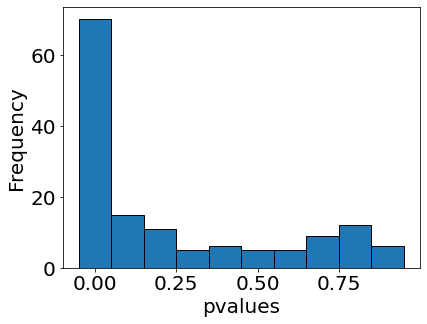

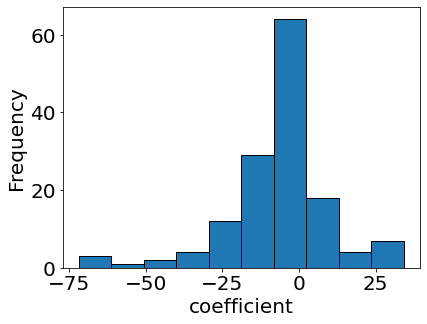

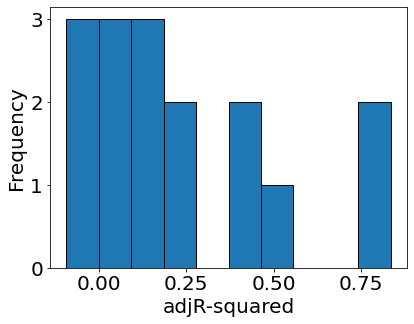

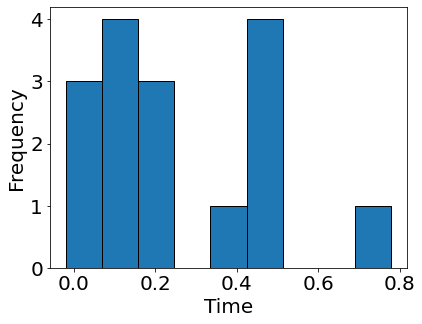

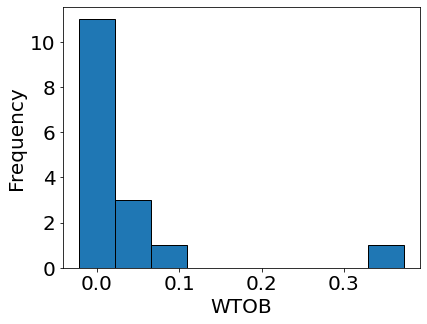

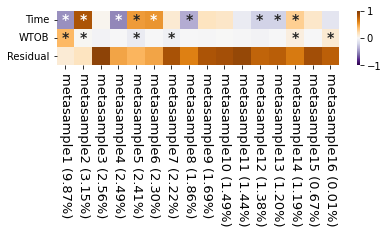

In [210]:
    pvals = AnalClss.ANOVA_Time_Indiv_Fasting(metasamples,ICAexplain)

 ## Display of sample independent component

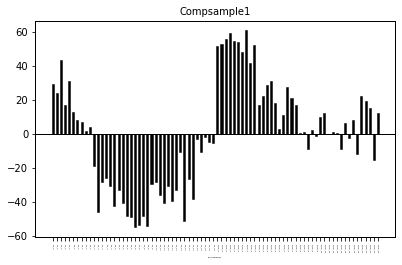

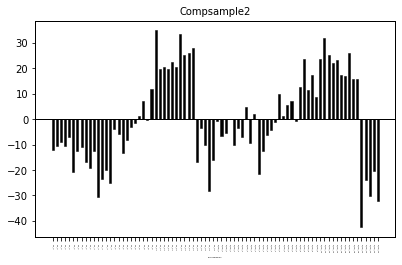

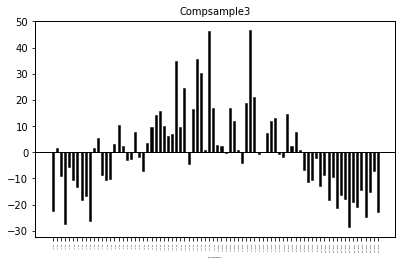

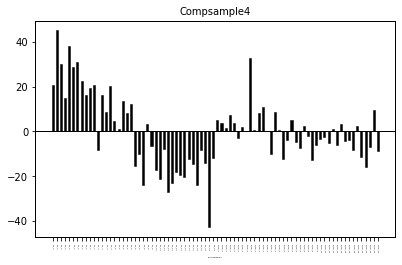

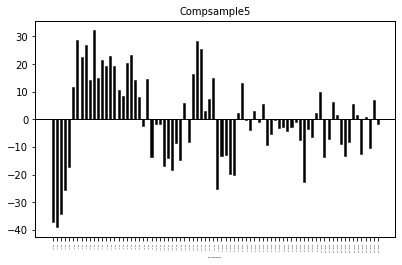

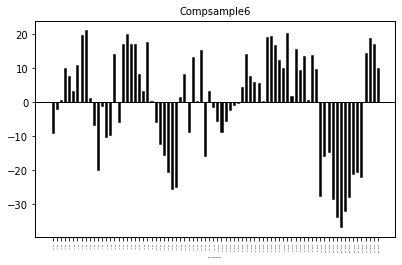

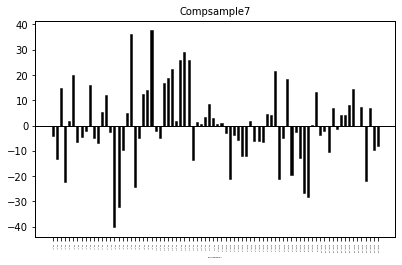

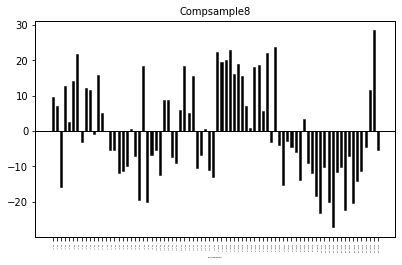

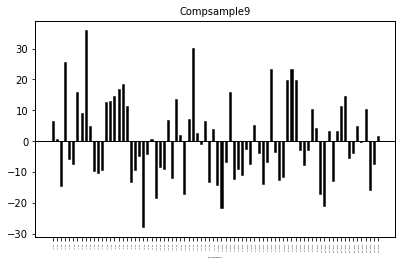

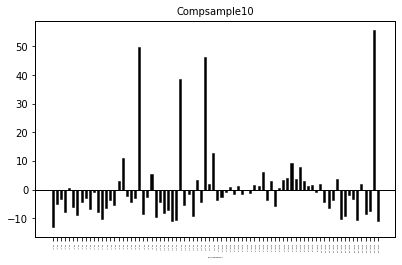

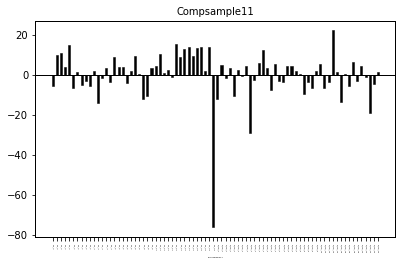

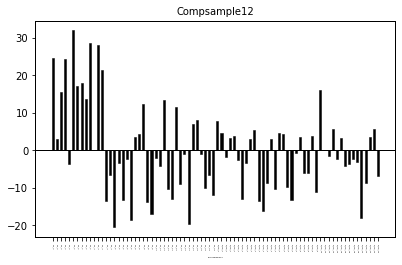

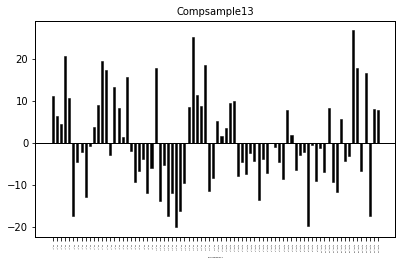

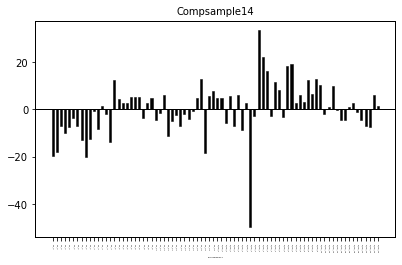

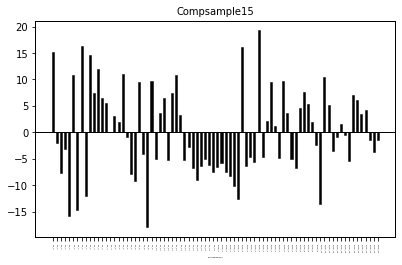

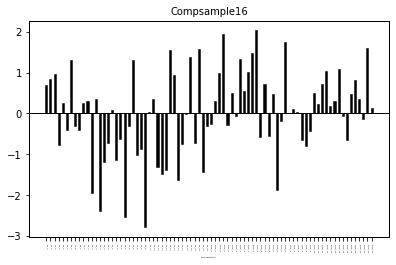

In [206]:
    AnalClss.Analeachcomponents(metasamples,metasamples) 

# Proteome


## Load data

In [38]:
  
    ICAProtClss = ICAHel.ICA_class()
    AnalProtClss = AnalHel.Anal_class()

    
    LiverProtDF = pd.read_csv(file_dir+'/proteome_matched.csv',header=0,index_col=0)
    NameProtDF  = pd.read_csv(file_dir+'/sample_info_liver.csv',header=0,index_col=0)

    LiverDF['Name'] = list(LiverDF.index)
    #LiverDF.index=LiverDF['EnsemblID_gene_']
    OptionProtDict={};
    OptionProtDict['ShortName'] = {key: val for key, val in zip(list(LiverProtDF['Name']), list(LiverProtDF['ShortName']))}


    LiverProtDF.index = [ LiverProtDF.iloc[index]['ShortName']   if j == 'Hist1h2an' else j for index,j in enumerate(LiverProtDF.index )]

    LiverProtDF = LiverProtDF.drop(['UniprotID','UniprotName','EnsemblID_gene_','EnsemblID_transcript_','EnsemblID_protein_','EntrezID','ShortName'],axis=1)


In [5]:
#LiverDF

## Data  preprocessing

In [39]:
    LiverNewProtDF, BloodDict = DelNaN(LiverProtDF,'any') ##delete missing values
    LiverNewProtDF=LiverNewProtDF.astype(float)

    NormalizedLiverProtDF,RawProtDF,WTOBProtHstack_mean,WTOBProtHstack_sem= changeshapeDF_Fastingmice(LiverNewProtDF)
    #NormalizedLiverDF,RawDF= changeshapeDF_Fastingmice_MoritaNmrz(LiverNewDF)
    #NormalizedLiverDF.to_excel(save_dir+'NormalizedLiver_FastingDF.xlsx')
    
    WTOBProtDF_mean=pd.DataFrame(WTOBProtHstack_mean);WTOBProtDF_mean.index=list(NormalizedLiverProtDF.index)
    WTOBProtDF_sem=pd.DataFrame(WTOBProtHstack_sem);WTOBProtDF_sem.index=list(NormalizedLiverProtDF.index)
    OptionProtDict['std']=WTOBProtDF_sem

    #NormalizedLiverDF   

## Perform ICA

80 100
Getting 80 ICs * 100 times in parallel.


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarni

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

Calculating distances b/w ICs.
DBSCAN identified 25 clusters of ICs.
Orthogonality of ICs is 100.0 %


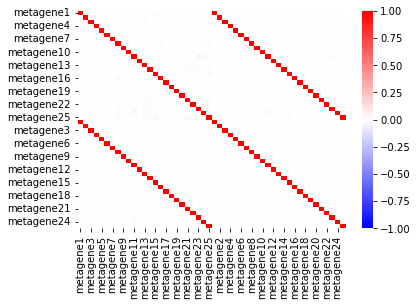

In [27]:
    # Repeat ICA (parallelization)
    num_of_rep = 100
    #Number of independent components
    k =80#100
    W,S = ICAClss.robust_ica(NormalizedLiverProtDF,k, num_of_rep)

   ## Calculate metasample, sort independent components by explanatory ratio


In [28]:
    metagenes, metasamples, ICAexplain = ICAClss.ICAsort(NormalizedLiverProtDF, W, S)
    #metagenes.to_excel(save_dir+'MolScore.xlsx')
    #metasamples.to_excel(save_dir+'SampleScore.xlsx')     

 ## Display the explanation rate up to the calculated IC

In [33]:
    del(ICAHel )
    import ICAHelper as ICAHel 
    import importlib

    import sys
    import pprint
    
    pprint.pprint(sys.path)
    importlib.reload(ICAHel)
    ICAProtClss = ICAHel.ICA_class()


['/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/fujita/.ipython']


62.65% data explained by 80 metagenes


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

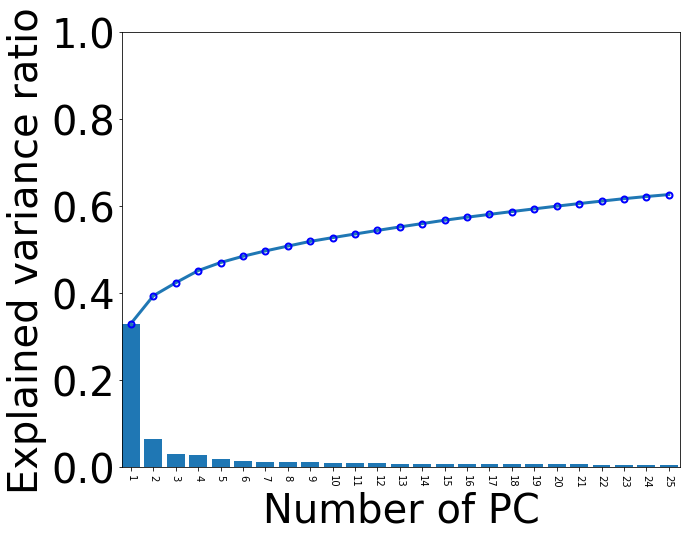

In [34]:
    print("{:.2%}".format(sum(ICAexplain)) + " data explained by " + str(k) + " metagenes")
    fig = plt.figure(figsize=(10,8))
    ICAProtClss.plotPCACovRatio(ICAexplain)
    plt.xticks(size='10',rotation=270);plt.yticks(size='40')

  ## Module detection and enrichment analysis using each independent component


In [40]:
    qvalcutoff=0.1
    modules = AnalProtClss.metagenes_topBH(metagenes, qvalcutoff, BloodDict,WTOBProtDF_mean, OptionProtDict)

error_1KEGG_2019_Mouse
error_1TRANSFAC_and_JASPAR_PWMs
error_1MSigDB_Computational
error_1Disease_Perturbations_from_GEO_down
error_1Disease_Perturbations_from_GEO_up
error_1GO_Biological_Process_2021
                                                  Term       P-value  \
Index                                                                  
1                                         Gap junction  1.483579e-22   
2                                            Phagosome  6.938141e-19   
3                                       Tight junction  5.290804e-09   
4                                            Apoptosis  6.707593e-06   
5                 Leukocyte transendothelial migration  4.721828e-03   
6                              Proteoglycans in cancer  1.409496e-02   
7                     Regulation of actin cytoskeleton  1.599216e-02   
8                                            Mitophagy  5.522967e-02   
9                               Gastric acid secretion  6.457252e-02   
10     

                                                    Term       P-value  \
Index                                                                    
1         Hypertension C0020538 mouse GSE1674 sample 400  8.434886e-13   
2      thymic carcinoma DOID-3284 mouse GSE2501 sampl...  4.415620e-12   
3      Thymic Carcinoma C0205969 mouse GSE2501 sample...  6.031470e-12   
4      nemaline myopathy DOID-3191 mouse GSE3384 samp...  5.544044e-11   
5      Hepatocellular carcinoma DOID-684 human GSE103...  8.502738e-11   
...                                                  ...           ...   
511    ulcerative colitis DOID-8577 human GSE37283 sa...  3.232600e-01   
512    intracranial aneurysm DOID-10941 human GSE2696...  3.282242e-01   
513    facioscapulohumeral muscular dystrophy DOID-11...  3.288423e-01   
514    amyotrophic lateral sclerosis DOID-332 mouse G...  3.435166e-01   
515    polycystic ovary syndrome DOID-11612 human GSE...  3.614336e-01   

       Odds Ratio  Combined Score  \


                                                    Term   P-value  \
Index                                                                
1                           Steroid hormone biosynthesis  0.003531   
2      Phenylalanine, tyrosine and tryptophan biosynt...  0.007973   
3                     Vascular smooth muscle contraction  0.008511   
4                             Oxytocin signaling pathway  0.010219   
5             Synthesis and degradation of ketone bodies  0.010948   
6                                         Tight junction  0.011931   
7                         Primary bile acid biosynthesis  0.015886   
8                                  Arginine biosynthesis  0.018838   
9                Proximal tubule bicarbonate reclamation  0.021782   
10                              Phenylalanine metabolism  0.022761   
11                                  Butanoate metabolism  0.026669   
12                                 Fatty acid elongation  0.028617   
13                  

             Term   P-value  Odds Ratio  Combined Score  \
Index                                                     
1       MORF JUND  0.001845   35.695341      224.704832   
2      MORF HDAC2  0.002516   12.691713       75.960285   
3       MORF SOD1  0.002516   12.691713       75.960285   
4      MODULE 235  0.002936   27.990155      163.204737   
5       MORF GNB1  0.003242   11.576471       66.350668   
...           ...       ...         ...             ...   
183     MODULE 69  0.416938    1.927743        1.686422   
184     MODULE 84  0.427042    1.866308        1.587990   
185    MODULE 117  0.525291    1.387888        0.893526   
186     MODULE 55  0.573567    1.209768        0.672487   
187     MODULE 88  0.575344    1.203735        0.665409   

                        Genes  Adjusted P-value  Old P-value  \
Index                                                          
1                [MYL6, CFL1]          0.096934            0   
2      [ARFGEF1, AIMP2, GOT2]          0

                               Term       P-value  Odds Ratio  Combined Score  \
Index                                                                           
1      Systemic lupus erythematosus  2.307977e-13  117.611852     3422.179651   
2                       Necroptosis  1.243715e-12   94.352381     2586.474126   
3                        Alcoholism  3.351099e-12   82.894241     2190.209489   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [HIST3H2A, H2AFJ, HIST1H2AH, HIST1H2AK, H2AFX,...      6.923932e-13   
2      [HIST3H2A, H2AFJ, HIST1H2AH, HIST1H2AK, H2AFX,...      1.865572e-12   
3      [HIST3H2A, H2AFJ, HIST1H2AH, HIST1H2AK, H2AFX,...      3.351099e-12   

       Old P-value  Old Adjusted P-value  
Index                                     
1                0                     0  
2                0                     0  
3                0             

                                                    Term   P-value  \
Index                                                                
1      cystic fibrosis DOID-1485 mouse GSE33319 sampl...  0.002869   
2      Non-syndromic cleft lip and palate DOID-9296 h...  0.006172   
3      Pauciarticular juvenile arthritis C0157917 hum...  0.024095   
4      autism spectrum disorder DOID-0060041 human GS...  0.030745   
5      atopic dermatitis DOID-3310 human GSE26952 sam...  0.032793   
6      autistic disorder DOID-12849 human GSE6575 sam...  0.072152   
7      autistic disorder DOID-12849 human GSE6575 sam...  0.121217   
8      CML - Chronic myeloid leukemia C0023473 human ...  0.133881   
9      colon adenoma DOID-0050912 mouse GSE422 sample...  0.144820   
10     Infertility due to azoospermia C1321542 mouse ...  0.155629   
11       osteoarthritis DOID-8398 rat GSE8077 sample 943  0.185063   
12     Down syndrome DOID-14250 human GSE35561 sample...  0.187287   
13          Bone fra

                                                    Term   P-value  \
Index                                                                
1      autism spectrum disorder DOID-0060041 human GS...  0.032416   
2      autism spectrum disorder DOID-0060041 human GS...  0.036061   
3      autism spectrum disorder DOID-0060041 human GS...  0.037046   
4            H1N1 DOID-0050211 human GSE27131 sample 514  0.055548   
5      Schistosomiases C0036323 mouse GSE19525 sample...  0.069532   
6      acute myocarditis DOID-3951 mouse GSE35182 sam...  0.076666   
7      Crohn's disease DOID-8778 human GSE1710 sample...  0.118024   
8       Nephroblastoma C0027708 human GSE2712 sample 418  0.151013   
9      Type 1 diabetes mellitus C0011854 mouse GSE162...  0.187287   
10     prostate cancer DOID-10283 human GSE55945 samp...  0.196124   
11         colitis DOID-0060180 human GSE6731 sample 761  0.196124   
12     epidermolysis bullosa simplex DOID-4644 human ...  0.198319   
13     abdominal aor

                                                    Term   P-value  \
Index                                                                
1          peptidyl-amino acid modification (GO:0018193)  0.008966   
2          peptidyl-methionine modification (GO:0018206)  0.010750   
3      N-terminal protein amino acid modification (GO...  0.012530   
4      regulation of rhodopsin mediated signaling pat...  0.022272   
5      regulation of G protein-coupled receptor signa...  0.071312   
6                        protein maturation (GO:0051604)  0.083826   
7                        protein processing (GO:0016485)  0.091258   
8      regulation of response to external stimulus (G...  0.110799   
9                               proteolysis (GO:0006508)  0.229166   
10     cellular protein modification process (GO:0006...  0.612248   

       Odds Ratio  Combined Score     Genes  Adjusted P-value  Old P-value  \
Index                                                                        
1  

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1      NKX2-8 (human)  0.002324   12.994730       78.804581   
2       PPARA (human)  0.002731   12.258085       72.359275   
3        LEF1 (human)  0.012506    2.998553       13.138350   
4       Nobox (mouse)  0.018616   10.462841       41.681355   
5         CRX (human)  0.050573    3.226371        9.628590   
...               ...       ...         ...             ...   
172       MAX (human)  0.881971    0.466787        0.058627   
173     FOXL1 (human)  0.894421    0.582119        0.064952   
174       SP1 (mouse)  0.928511    0.373463        0.027701   
175     GATA1 (human)  0.951280    0.323021        0.016134   
176     GATA2 (human)  0.996340    0.313095        0.001148   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1                       

                                                    Term       P-value  \
Index                                                                    
1                                urea cycle (GO:0000050)  1.877708e-10   
2      cellular amino acid catabolic process (GO:0009...  3.169801e-08   
3                amide biosynthetic process (GO:0043604)  2.352762e-07   
4      organonitrogen compound biosynthetic process (...  5.305136e-07   
5        alpha-amino acid metabolic process (GO:1901605)  1.471004e-05   
...                                                  ...           ...   
134    negative regulation of signal transduction (GO...  2.460127e-01   
135    cellular macromolecule biosynthetic process (G...  2.828588e-01   
136    negative regulation of gene expression (GO:001...  2.889571e-01   
137         regulation of apoptotic process (GO:0042981)  5.481131e-01   
138           regulation of gene expression (GO:0010468)  6.881564e-01   

       Odds Ratio  Combined Score    

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1       FOXA2 (human)  0.001499   40.956790      266.338717   
2       GATA6 (human)  0.015183    5.140125       21.524511   
3       PRDM1 (human)  0.015946    5.060656       20.943749   
4       NR3C1 (mouse)  0.030025    4.114060       14.422787   
5       CRTC3 (human)  0.030625    5.150882       17.955617   
...               ...       ...         ...             ...   
131    POU2F2 (human)  0.878244    0.473913        0.061528   
132      ETS1 (human)  0.885985    0.523696        0.063396   
133     GATA2 (human)  0.909372    0.557003        0.052916   
134     FOXC1 (human)  0.932686    0.521584        0.036348   
135      USF2 (human)  0.947357    0.328612        0.017771   

                                       Genes  Adjusted P-value  Old P-value  \
Index                                                                         
1                     

                                                    Term       P-value  \
Index                                                                    
1                    platelet degranulation (GO:0002576)  1.521921e-10   
2      post-translational protein modification (GO:00...  1.322991e-09   
3                      regulated exocytosis (GO:0045055)  1.382549e-09   
4      regulation of heterotypic cell-cell adhesion (...  1.883701e-09   
5        cellular protein metabolic process (GO:0044267)  4.928098e-09   
...                                                  ...           ...   
267    positive regulation of protein phosphorylation...  2.306616e-01   
268                neutrophil degranulation (GO:0043312)  2.888888e-01   
269    neutrophil activation involved in immune respo...  2.909269e-01   
270            neutrophil mediated immunity (GO:0002446)  2.924519e-01   
271    positive regulation of cellular process (GO:00...  3.589371e-01   

       Odds Ratio  Combined Score    

                                                    Term   P-value  \
Index                                                                
1      COPD - Chronic obstructive pulmonary disease C...  0.000010   
2      Purpura, Idiopathic Thrombocytopenic C0043117 ...  0.000032   
3      Peripheral motor neuropathy C0235025 mouse GSE...  0.000111   
4      APECED - Autoimmune polyendocrinopathy-candidi...  0.000124   
5      Down syndrome DOID-14250 human GSE19681 sample...  0.000144   
...                                                  ...       ...   
281    nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.181029   
282    pancreatic ductal adenocarcinoma DOID-3498 mou...  0.183042   
283    autistic disorder DOID-12849 human GSE6575 sam...  0.189056   
284    West Nile fever DOID-2366 human GSE30719 sampl...  0.194038   
285    pulmonary tuberculosis DOID-2957 mouse GSE4802...  0.200640   

       Odds Ratio  Combined Score                       Genes  \
Index                   

                Term   P-value  Odds Ratio  Combined Score  \
Index                                                        
1       NFYA (human)  0.005131    5.144416       27.123671   
2      FOXF2 (human)  0.012879    5.414109       23.563122   
3       NFYA (mouse)  0.028557    4.183945       14.877485   
4      SOX10 (mouse)  0.038602    7.252042       23.601375   
5       IRF7 (human)  0.067135   15.610675       42.165285   
...              ...       ...         ...             ...   
155    GATA2 (human)  0.909372    0.557003        0.052916   
156    PPARG (human)  0.936849    0.352634        0.023004   
157    FOXL1 (human)  0.942506    0.412336        0.024415   
158     USF2 (human)  0.947357    0.328612        0.017771   
159     ETS1 (human)  0.979108    0.241640        0.005102   

                                              Genes  Adjusted P-value  \
Index                                                                   
1      [CENPV, H3F3B, COPB1, PPIB, KPNB1, HIST1

                                                    Term   P-value  \
Index                                                                
1      modulation by host of viral genome replication...  0.000048   
2                  neutrophil degranulation (GO:0043312)  0.000273   
3      neutrophil activation involved in immune respo...  0.000282   
4              neutrophil mediated immunity (GO:0002446)  0.000288   
5      activation of protein kinase C activity (GO:19...  0.003495   
...                                                  ...       ...   
197    negative regulation of transcription, DNA-temp...  0.493417   
198           regulation of gene expression (GO:0010468)  0.540077   
199    positive regulation of transcription, DNA-temp...  0.574243   
200    regulation of transcription by RNA polymerase ...  0.805389   
201    regulation of transcription, DNA-templated (GO...  0.811129   

       Odds Ratio  Combined Score                        Genes  \
Index                  

                                                    Term   P-value  \
Index                                                                
1      actinic keratosis DOID-8866 human GSE2503 samp...  0.000012   
2      Actinic keratosis C0022602 human GSE2503 sampl...  0.000012   
3      atopic dermatitis skin DOID-3310 human GSE3292...  0.000087   
4         Breast Cancer C0006142 human GSE2155 sample 39  0.000102   
5      head and neck squamous cell carcinoma 5520 hum...  0.000114   
...                                                  ...       ...   
76     Malignant mesothelioma of pleura C0812413 huma...  0.113357   
77     idiopathic pulmonary fibrosis DOID-0050156 hum...  0.114442   
78     idiopathic pulmonary fibrosis DOID-0050156 hum...  0.116338   
79     idiopathic urticaria DOID-1555 human GSE57178 ...  0.116338   
80     Psoriasis vulgaris C0263361 human GSE13355 sam...  0.119041   

       Odds Ratio  Combined Score                 Genes  Adjusted P-value  \
Index       

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1        SND1 (mouse)  0.001283   45.227273      301.131396   
2       Nr2e3 (mouse)  0.003024   28.979562      168.116942   
3       CREB1 (mouse)  0.012580    7.542159       33.002059   
4        RELA (mouse)  0.013498    5.549637       23.892194   
5      TFAP2A (mouse)  0.013696    5.524111       23.701960   
...               ...       ...         ...             ...   
117      ETS1 (human)  0.963687    0.285612        0.010564   
118     GATA2 (human)  0.980496    0.334135        0.006581   
119     FOXL1 (human)  0.982976    0.224887        0.003861   
120       YY1 (human)  0.986666    0.209884        0.002817   
121     FOXC1 (human)  0.995215    0.260694        0.001251   

                                Genes  Adjusted P-value  Old P-value  \
Index                                                                  
1                      [H2-K1, H2-D1

                                                    Term   P-value  \
Index                                                                
1      Intestinal polyposis UMLS CUI-C1257915 mouse G...  0.000083   
2      nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.000108   
3      nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.000342   
4              Hypoxia C0242184 human GSE4483 sample 440  0.000516   
5       Cystic Fibrosis C0010674 mouse GSE769 sample 428  0.000516   
...                                                  ...       ...   
248    Actinic keratosis C0022602 human GSE2503 sampl...  0.229159   
249    actinic keratosis DOID-8866 human GSE2503 samp...  0.229631   
250    nasopharynx carcinoma DOID-9261 human GSE12452...  0.231047   
251     prolactinoma DOID-5394 human GSE36314 sample 636  0.234343   
252    amyotrophic lateral sclerosis DOID-332 mouse G...  0.244616   

       Odds Ratio  Combined Score                           Genes  \
Index               

                Term   P-value  Odds Ratio  Combined Score         Genes  \
Index                                                                      
1      NR1I2 (human)  0.013753   26.876534      115.206742  [GNB2, GNB4]   
2       EGR1 (mouse)  0.018544   22.764087       90.774668  [GNB1, GNB4]   
3        SP1 (mouse)  0.038474   14.960984       48.739567  [GNB1, GNB4]   
4      HINFP (human)  0.062546   11.134319       30.862770  [GNB1, GNB4]   
5      NFKB1 (mouse)  0.072017   10.185862       26.797564  [GNB1, GNB4]   
...              ...       ...         ...             ...           ...   
61     GATA2 (human)  0.498875    2.006211        1.395120  [GNB1, GNB4]   
62      ETS1 (human)  0.563379    1.571799        0.901901        [GNB4]   
63     FOXL1 (human)  0.638697    1.237661        0.554875        [GNB4]   
64       YY1 (human)  0.660099    1.155107        0.479791        [GNB4]   
65     FOXC1 (human)  0.727906    1.043683        0.331457  [GNB2, GNB4]   

       Adju

                                                    Term   P-value  \
Index                                                                
1      Generalized seizures C0234533 rat GSE1156 samp...  0.000589   
2        Down Syndrome C0013080 mouse GSE1611 sample 105  0.000640   
3      Huntington's disease DOID-12858 mouse GSE3248 ...  0.000720   
4      Diabetic Retinopathy C0011884 rat GSE1979 samp...  0.000885   
5      Huntington's disease DOID-12858 mouse GSE3248 ...  0.001022   
...                                                  ...       ...   
90     multiple myeloma DOID-9538 human GSE6691 sampl...  0.066569   
91     hepatocellular carcinoma DOID-684 human GSE582...  0.066712   
92     pancreatic ductal adenocarcinoma DOID-3498 mou...  0.073001   
93     Purpura, Idiopathic Thrombocytopenic C0043117 ...  0.077558   
94     West Nile fever DOID-2366 human GSE30719 sampl...  0.077700   

       Odds Ratio  Combined Score         Genes  Adjusted P-value  \
Index               

                Term   P-value  Odds Ratio  Combined Score  \
Index                                                        
1       RELA (human)  0.000154   18.659805      163.746138   
2       E2F1 (human)  0.012970    6.262891       27.213154   
3       IRF2 (human)  0.015023    7.913272       33.221470   
4      NFKB1 (human)  0.036021    4.723447       15.699134   
5      FOXA3 (human)  0.079875   13.721221       34.677528   
...              ...       ...         ...             ...   
115    FOXL1 (human)  0.719763    0.825019        0.271294   
116    FOXC1 (human)  0.721511    0.869681        0.283871   
117      JUN (human)  0.724483    0.817143        0.263362   
118    RUNX1 (human)  0.819909    0.597807        0.118701   
119     ETS1 (human)  0.890316    0.448937        0.052157   

                                          Genes  Adjusted P-value  \
Index                                                               
1      [DARS, RAB5C, CDC37, AP1B1, GLUL, RAB5A]        

                                                    Term   P-value  \
Index                                                                
1      rheumatoid arthritis DOID-7148 human GSE10500 ...  0.000323   
2             Dehydration C0011175 rat GSE3131 sample 60  0.000341   
3      Diabetic Retinopathy C0011884 rat GSE1979 samp...  0.004277   
4       endometriosis DOID-289 human GSE23339 sample 883  0.005354   
5      Intestinal metaplasia of gastric mucosa C02671...  0.005612   
...                                                  ...       ...   
182    Diabetic Nephropathy C0011881 human GSE1009 sa...  0.154111   
183     prolactinoma DOID-5394 human GSE36314 sample 636  0.163054   
184     breast cancer DOID-1612 human GSE3744 sample 978  0.164081   
185       Breast Cancer C0006142 human GSE3744 sample 24  0.166131   
186    amyotrophic lateral sclerosis DOID-332 mouse G...  0.170557   

       Odds Ratio  Combined Score                 Genes  Adjusted P-value  \
Index       

                Term   P-value  Odds Ratio  Combined Score  \
Index                                                        
1       GLI2 (human)  0.010972    9.506327       42.896589   
2      Sox17 (mouse)  0.012052   15.658635       69.188501   
3       RXRA (mouse)  0.012377   15.436040       67.793472   
4      NR3C1 (human)  0.013756    8.698488       37.283971   
5        SRF (human)  0.019289    6.470336       25.546208   
...              ...       ...         ...             ...   
134    NFKB1 (mouse)  0.715142    0.848309        0.284416   
135    PPARG (human)  0.748635    0.764366        0.221286   
136    GATA2 (human)  0.772245    0.752179        0.194403   
137    NR5A2 (human)  0.772766    0.707001        0.182250   
138    RUNX1 (human)  0.776863    0.697484        0.176109   

                              Genes  Adjusted P-value  Old P-value  \
Index                                                                
1            [ACTA2, ACTA1, EIF4G1]          0.474592

                                                    Term       P-value  \
Index                                                                    
1                        muscle contraction (GO:0006936)  5.694604e-08   
2      skeletal muscle thin filament assembly (GO:003...  1.573895e-06   
3               skeletal myofibril assembly (GO:0014866)  2.936980e-06   
4      positive regulation of macromolecule metabolic...  4.473188e-06   
5      positive regulation of gene expression (GO:001...  1.100733e-05   
...                                                  ...           ...   
92       cellular protein metabolic process (GO:0044267)  1.371505e-01   
93     positive regulation of nucleic acid-templated ...  1.657328e-01   
94     positive regulation of cellular process (GO:00...  1.993043e-01   
95     positive regulation of transcription, DNA-temp...  3.474491e-01   
96     regulation of transcription, DNA-templated (GO...  5.653407e-01   

        Odds Ratio  Combined Score   

              Term   P-value  Odds Ratio  Combined Score            Genes  \
Index                                                                       
1         GNF2 MSN  0.000021  453.909091     4896.915145  [RAP1B, IQGAP1]   
2       GNF2 RAP1B  0.000047  293.529412     2924.900561  [RAP1B, IQGAP1]   
3        GNF2 CD97  0.000052  277.194444     2731.812203  [RAP1B, IQGAP1]   
4        MODULE 86  0.000067  243.329268     2337.303968   [RAP1B, RAP1A]   
5        MODULE 87  0.000071  237.523810     2270.521513   [RAP1B, RAP1A]   
6       MODULE 159  0.000240  126.044304     1050.324184  [RAP1B, EIF2S2]   
7       GNF2 CASP4  0.007179  173.660870      857.287488         [IQGAP1]   
8        GNF2 JAK1  0.009563  128.793548      598.874237          [RAP1B]   
9      GNF2 INPP5D  0.012832   95.009524      413.841240          [RAP1B]   
10      GNF2 ITGAL  0.016389   73.851852      303.616222          [RAP1B]   
11      GNF2 ITGB2  0.016981   71.207143      290.217824         [IQGAP1]   

                                                    Term   P-value  \
Index                                                                
1        pancreatitis DOID-4989 mouse GSE3644 sample 513  0.000002   
2      Huntington's disease DOID-12858 human GSE1751 ...  0.000138   
3      Acute pancreatitis C0001339 mouse GSE3644 samp...  0.000166   
4      Uterine leiomyoma C0042133 human GSE2725 sampl...  0.002403   
5      Uterine leiomyoma C0042133 human GSE2724 sampl...  0.002477   
...                                                  ...       ...   
149    inclusion body myositis DOID-3429 human GSE482...  0.122545   
150    acute myocardial infarction DOID-9408 mouse GS...  0.123352   
151    acute myocardial infarction DOID-9408 mouse GS...  0.125769   
152    Cardiomyopathy, Dilated C0007193 human GSE3586...  0.127645   
153    Nemaline Myopathy C0206157 mouse GSE3384 sampl...  0.131920   

       Odds Ratio  Combined Score                           Genes  \
Index               

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1      CACYBP (mouse)  0.001867    7.933287       49.847894   
2       FOXA2 (mouse)  0.008311    6.454767       30.919639   
3      TFAP2A (mouse)  0.013696    5.524111       23.701960   
4        IRF2 (mouse)  0.014953    5.371915       22.577318   
5       SMAD3 (mouse)  0.042366   25.501921       80.621991   
...               ...       ...         ...             ...   
116     FOXC1 (human)  0.923544    0.521620        0.041488   
117      TCF4 (human)  0.941406    0.340806        0.020578   
118      NFIC (human)  0.949448    0.321878        0.016697   
119     FOXL1 (human)  0.982976    0.224887        0.003861   
120       YY1 (human)  0.986666    0.209884        0.002817   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [SERPINA1A, SERPI

                                                    Term   P-value  \
Index                                                                
1      regulation of primary metabolic process (GO:00...  0.002652   
2              cellular response to hypoxia (GO:0071456)  0.002692   
3                   regulation of mitophagy (GO:1901524)  0.002997   
4                             ADP transport (GO:0015866)  0.002997   
5              xenobiotic catabolic process (GO:0042178)  0.004193   
...                                                  ...       ...   
120                       protein transport (GO:0015031)  0.200309   
121                  organelle organization (GO:0006996)  0.224893   
122                  protein ubiquitination (GO:0016567)  0.273340   
123     cytokine-mediated signaling pathway (GO:0019221)  0.315189   
124    cellular protein modification process (GO:0006...  0.468205   

       Odds Ratio  Combined Score           Genes  Adjusted P-value  \
Index             

                                                    Term   P-value  \
Index                                                                
1      Setleis syndrome C1744559 human GSE16524 sampl...  0.001044   
2      Acute Lung Injury C0242488 mouse GSE1871 sampl...  0.001265   
3          psoriasis DOID-8893 human GSE32407 sample 836  0.001678   
4      Pulmonary Fibrosis C0034069 mouse GSE2640 samp...  0.002091   
5       Atherosclerosis C0004153 mouse GSE363 sample 193  0.002191   
...                                                  ...       ...   
175     breast cancer DOID-1612 human GSE3744 sample 978  0.105961   
176       Breast Cancer C0006142 human GSE3744 sample 24  0.107332   
177    nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.107560   
178    acute myeloid leukemia DOID-9119 human GSE9476...  0.108701   
179    Cardiac Hypertrophy C1383860 rat GSE1055 sampl...  0.111434   

       Odds Ratio  Combined Score              Genes  Adjusted P-value  \
Index          

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1        NRF1 (human)  0.004719    7.877008       42.190950   
2         Myb (mouse)  0.015578    5.446636       22.668271   
3        NFYB (human)  0.016381   68.827586      282.994903   
4      TFAP2D (human)  0.031975    5.299394       18.244705   
5        EGR1 (mouse)  0.053242    4.269284       12.521408   
...               ...       ...         ...             ...   
131       YY1 (human)  0.889843    0.513208        0.059897   
132      LEF1 (human)  0.945922    0.329225        0.018303   
133      ETS1 (human)  0.952127    0.314194        0.015413   
134     FOXL1 (human)  0.976094    0.247393        0.005986   
135     FOXC1 (human)  0.989342    0.297980        0.003193   

                                Genes  Adjusted P-value  Old P-value  \
Index                                                                  
1       [RTN3, PRDX4, SEC16A, MAPRE3

                                                    Term   P-value  \
Index                                                                
1      protein localization to microtubule end (GO:19...  0.000003   
2      protein localization to microtubule plus-end (...  0.000003   
3      regulation of microtubule polymerization or de...  0.000103   
4      regulation of microtubule cytoskeleton organiz...  0.000181   
5      regulation of microtubule polymerization (GO:0...  0.000212   
...                                                  ...       ...   
172         regulation of apoptotic process (GO:0042981)  0.340299   
173    regulation of transcription, DNA-templated (GO...  0.354511   
174    cellular protein modification process (GO:0006...  0.439461   
175           regulation of gene expression (GO:0010468)  0.456765   
176    positive regulation of transcription, DNA-temp...  0.488731   

        Odds Ratio  Combined Score              Genes  Adjusted P-value  \
Index         

                                                    Term   P-value  \
Index                                                                
1              Hypoxia C0242184 human GSE4483 sample 440  0.002724   
2      Type 2 diabetes mellitus C0011860 rat GSE3068 ...  0.002923   
3      cerebral palsy DOID-1969 human GSE31243 sample...  0.002983   
4      Muscular Dystrophy C0026850 mouse GSE2629 samp...  0.003045   
5      Hepatocellular carcinoma DOID-684 human GSE103...  0.003190   
...                                                  ...       ...   
79             Epilepsy DOID-1826 rat GSE2880 sample 804  0.113357   
80     Streptococcal tonsillitis C0275804 mouse GSE11...  0.114171   
81     schizophrenia DOID-5419 human GSE12679 sample 769  0.118231   
82          Hypertension C0020538 rat GSE2739 sample 209  0.119041   
83     Cardiac Hypertrophy C1383860 rat GSE1055 sampl...  0.132187   

       Odds Ratio  Combined Score              Genes  Adjusted P-value  \
Index          

               Term   P-value  Odds Ratio  Combined Score    Genes  \
Index                                                                
1         MODULE 50  0.001949  832.708333     5196.553512  [PSMA4]   
2         MODULE 28  0.004792  322.032258     1719.878826  [PSMA4]   
3       GCM CSNK1A1  0.005390  285.171429     1489.484609  [ARL8B]   
4         MODULE 91  0.005540  277.236111     1440.455342  [PSMA4]   
5           GNF2 NS  0.005988  255.871795     1309.541399  [PSMA4]   
6         GCM IL6ST  0.008078  188.150943      906.615437  [ARL8B]   
7       GCM ERBB2IP  0.009570  158.206349      735.525760  [ARL8B]   
8          GCM CRKL  0.009570  158.206349      735.525760  [ARL8B]   
9        MODULE 525  0.010017  150.992424      695.092860  [ARL8B]   
10        MORF CUL1  0.010613  142.335714      647.016548  [PSMA4]   
11       GNF2 XRCC5  0.011208  134.614865      604.568747  [PSMA4]   
12         GCM DLG1  0.011655  129.350649      575.872814  [ARL8B]   
13       GNF2 PA2G4 

                                                    Term   P-value  \
Index                                                                
1              anemia DOID-2355 human GSE4619 sample 791  0.000711   
2      Viral cardiomyopathy C0264797 human GSE4172 sa...  0.001028   
3      amyotrophic lateral sclerosis DOID-332 mouse G...  0.020558   
4      esophagus squamous cell carcinoma DOID-3748 hu...  0.031025   
5        endometriosis DOID-289 human GSE6364 sample 947  0.031025   
...                                                  ...       ...   
111    autistic disorder DOID-12849 human GSE6575 sam...  0.066999   
112    Nemaline Myopathy C0206157 mouse GSE3384 sampl...  0.068287   
113    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.071574   
114    nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.072145   
115    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.073572   

       Odds Ratio  Combined Score           Genes  Adjusted P-value  \
Index             

              Term   P-value  Odds Ratio  Combined Score    Genes  \
Index                                                               
1       MODULE 493  0.017133   73.261029      297.934433  [SEPT8]   
2       MODULE 124  0.023773   52.368421      195.816488   [PHB2]   
3         MORF ERH  0.028180   43.986726      156.995603   [PHB2]   
4         MORF FBL  0.034274   35.972826      121.350111   [PHB2]   
5        MORF NPM1  0.039853   30.798137       99.248846   [PHB2]   
6       MORF G22P1  0.042029   29.154412       92.401782   [PHB2]   
7       MODULE 197  0.042754   28.644509       90.296113   [PHB2]   
8       MODULE 126  0.044925   27.215659       84.443933   [PHB2]   
9        MORF RPA2  0.046851   26.059211       79.761581   [PHB2]   
10       MORF DAP3  0.047332   25.785156       78.659319   [PHB2]   
11     MORF ANP32B  0.048294   25.253827       76.530518   [PHB2]   
12       MORF AATF  0.050215   24.253676       72.553565   [PHB2]   
13       MORF ACP1  0.051414   23.

                                                    Term   P-value  \
Index                                                                
1      regulation of cytochrome-c oxidase activity (G...  0.001249   
2      activation of protein kinase C activity (GO:19...  0.001249   
3                   RIG-I signaling pathway (GO:0039529)  0.001749   
4      positive regulation by symbiont of host autoph...  0.001749   
5            regulation of proton transport (GO:0010155)  0.001999   
...                                                  ...       ...   
62     positive regulation of intracellular signal tr...  0.129260   
63     negative regulation of cellular macromolecule ...  0.129483   
64          regulation of apoptotic process (GO:0042981)  0.172253   
65     negative regulation of transcription, DNA-temp...  0.215591   
66     regulation of transcription, DNA-templated (GO...  0.448496   

        Odds Ratio  Combined Score   Genes  Adjusted P-value  Old P-value  \
Index       

             Term   P-value  Odds Ratio  Combined Score          Genes  \
Index                                                                    
1      MODULE 492  0.006781  178.357143      890.652175        [ASAH1]   
2      MODULE 346  0.006781  178.357143      890.652175        [ASAH1]   
3      MODULE 408  0.007179  167.857143      828.653782        [ASAH1]   
4       MODULE 12  0.008421   18.281192       87.330646  [ASAH1, TPM1]   
5        MODULE 2  0.009536   17.111693       79.614663  [ASAH1, TPM1]   
...           ...       ...         ...             ...            ...   
66      MODULE 52  0.160655    6.468254       11.827195         [TPM1]   
67      MODULE 18  0.166813    6.203810       11.110297         [TPM1]   
68      MODULE 38  0.171575    6.012315       10.598110         [TPM1]   
69      MODULE 16  0.187056    5.457143        9.148073        [VDAC2]   
70      MODULE 45  0.210778    4.764359        7.417863        [ASAH1]   

       Adjusted P-value  Old P-value 

                                           Term   P-value  Odds Ratio  \
Index                                                                   
1                                 Legionellosis  0.000172  142.407143   
2                                 RNA transport  0.001416   48.067879   
3      Pentose and glucuronate interconversions  0.011841  100.808081   
4               Fructose and mannose metabolism  0.012188   97.838235   
5                                    Proteasome  0.015992   73.881481   
6                          Viral carcinogenesis  0.077460   14.448099   
7                  Epstein-Barr virus infection  0.077460   14.448099   
8                Human papillomavirus infection  0.119413    9.115135   

       Combined Score             Genes  Adjusted P-value  Old P-value  \
Index                                                                    
1         1234.425536  [EEF1A1, EEF1A2]          0.001376            0   
2          315.324546  [EEF1A1, EEF1A2]        

                                                    Term   P-value  \
Index                                                                
1      nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.000010   
2             Dehydration C0011175 rat GSE3131 sample 60  0.000048   
3        endometriosis DOID-289 human GSE6364 sample 945  0.000093   
4      Leukemia, Acute Megakaryocytic C0023462 mouse ...  0.000093   
5        astrocytoma DOID-3069 human GSE15824 sample 861  0.000113   
...                                                  ...       ...   
314      Down Syndrome C0013080 human GSE5390 sample 277  0.150328   
315    Nemaline Myopathy C0206157 mouse GSE3384 sampl...  0.152153   
316    amyotrophic lateral sclerosis DOID-332 mouse G...  0.159720   
317    nemaline myopathy DOID-3191 mouse GSE3384 samp...  0.160323   
318    autistic disorder DOID-12849 human GSE6575 sam...  0.167529   

       Odds Ratio  Combined Score                            Genes  \
Index              

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1       FOXF2 (human)  0.000291   13.548763      110.328089   
2        TP63 (human)  0.003981    8.594394       47.494678   
3        KLF5 (human)  0.004001    8.581541       47.380364   
4      ZBTB16 (human)  0.005430    7.832483       40.853213   
5         CRX (human)  0.026330    5.875434       21.369177   
...               ...       ...         ...             ...   
131      E2F1 (mouse)  0.809592    0.615930        0.130100   
132       TBP (mouse)  0.823290    0.587132        0.114166   
133     NR5A2 (human)  0.879607    0.471246        0.060451   
134      NFIC (human)  0.916854    0.393458        0.034155   
135      LEF1 (human)  0.929493    0.365829        0.026748   

                                      Genes  Adjusted P-value  Old P-value  \
Index                                                                        
1      [LARS, PTGES3, PR

                                                    Term   P-value  \
Index                                                                
1                   focal adhesion assembly (GO:0048041)  0.000047   
2          cell-substrate junction assembly (GO:0007044)  0.000125   
3      cell morphogenesis involved in differentiation...  0.000564   
4                      cell-matrix adhesion (GO:0007160)  0.001085   
5                     glutathione transport (GO:0034635)  0.002498   
...                                                  ...       ...   
164                         gene expression (GO:0010467)  0.164432   
165            regulation of cell migration (GO:0030334)  0.186294   
166      cellular protein metabolic process (GO:0044267)  0.190025   
167    positive regulation of intracellular signal tr...  0.241838   
168           regulation of gene expression (GO:0010468)  0.425770   

       Odds Ratio  Combined Score            Genes  Adjusted P-value  \
Index            

             Term   P-value  Odds Ratio  Combined Score  \
Index                                                     
1        GNF2 MSN  0.000144  139.601399     1235.331246   
2        MODULE 8  0.003490   11.702751       66.211874   
3      MORF ACTG1  0.004679   22.453620      120.455324   
4       MORF NPM1  0.006389   19.062500       96.327331   
5      MODULE 101  0.007476  158.539683      776.212425   
...           ...       ...         ...             ...   
116     MODULE 64  0.325483    2.689693        3.019032   
117     MODULE 84  0.341410    2.533498        2.722677   
118     MODULE 23  0.349493    2.459600        2.585711   
119     MODULE 45  0.358475    2.381321        2.442991   
120    MODULE 117  0.428058    1.884051        1.598609   

                       Genes  Adjusted P-value  Old P-value  \
Index                                                         
1             [IQGAP1, PFN1]          0.017223            0   
2      [MYO1B, IQGAP2, APOB]          0.135

                                                    Term   P-value  \
Index                                                                
1                                      Adherens junction  0.000190   
2      Arrhythmogenic right ventricular cardiomyopath...  0.000190   
3                 Bacterial invasion of epithelial cells  0.000201   
4                                   Salmonella infection  0.000223   
5                      Hypertrophic cardiomyopathy (HCM)  0.000271   
6                                      Viral myocarditis  0.000277   
7                           Dilated cardiomyopathy (DCM)  0.000297   
8                   Leukocyte transendothelial migration  0.000484   
9                      Thyroid hormone signaling pathway  0.000484   
10                                   Platelet activation  0.000572   
11                                             Apoptosis  0.000727   
12                Fluid shear stress and atherosclerosis  0.000747   
13                  

                                                    Term   P-value  \
Index                                                                
1      Neurofibromatosis DOID-8712 mouse GSE1482 samp...  0.000001   
2      Parkinson's disease DOID-14330 human GSE19587 ...  0.000011   
3      Parkinson's disease DOID-14330 human GSE19587 ...  0.000021   
4      Neurofibromatosis DOID-8712 mouse GSE1482 samp...  0.000030   
5              Hypertrophy C0020564 rat GSE739 sample 57  0.000060   
...                                                  ...       ...   
311    esophagus squamous cell carcinoma DOID-3748 hu...  0.116338   
312    Intestinal polyposis UMLS CUI-C1257915 mouse G...  0.119581   
313    intracranial aneurysm DOID-10941 human GSE2696...  0.124158   
314     prolactinoma DOID-5394 human GSE36314 sample 636  0.124964   
315    polycystic ovary syndrome DOID-11612 human GSE...  0.138831   

       Odds Ratio  Combined Score                       Genes  \
Index                   

 ## ANOVA & multiple comparison test


/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.

Scheffe_qvalues_Time


,0,2,4,6,8,12,16,24
metasample1_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample1_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample1_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample1_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample1_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
metasample18_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample18_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample18_12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample18_16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Scheffe_qvalues_WTOB


,WT,OB
metasample1_WT,1.000000e+00,2.130111e-67
metasample1_OB,2.130111e-67,1.000000e+00
metasample4_WT,1.000000e+00,4.555483e-07
metasample4_OB,4.555483e-07,1.000000e+00
metasample12_WT,1.000000e+00,1.814555e-01
metasample12_OB,1.814555e-01,1.000000e+00
metasample13_WT,1.000000e+00,8.424411e-01
metasample13_OB,8.424411e-01,1.000000e+00
metasample15_WT,1.000000e+00,1.805435e-01
metasample15_OB,1.805435e-01,1.000000e+00


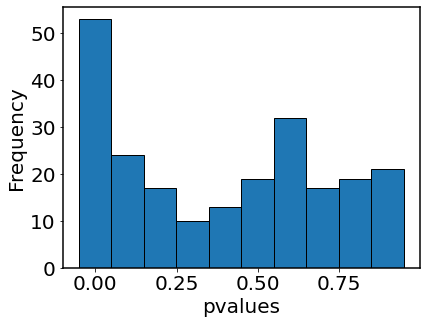

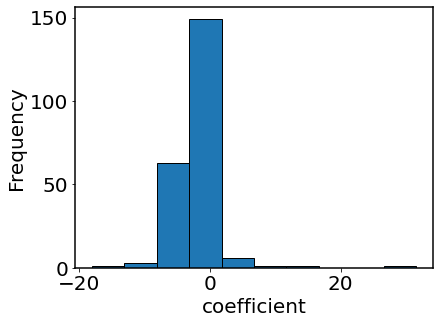

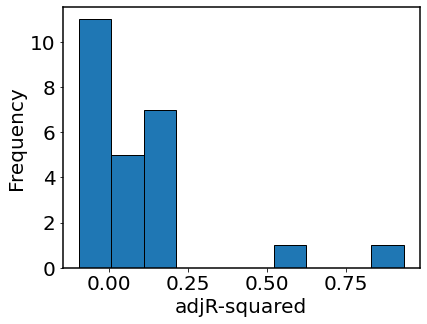

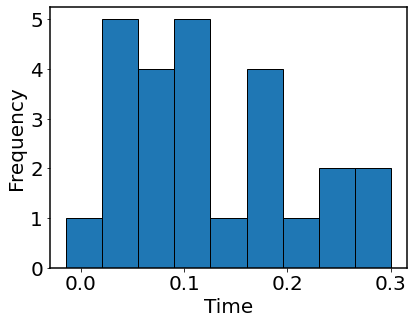

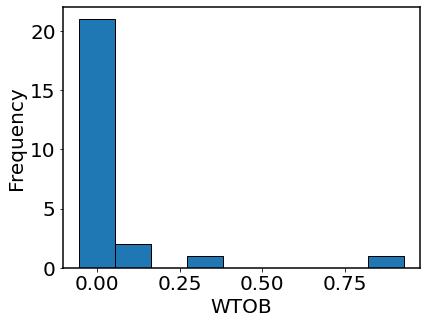

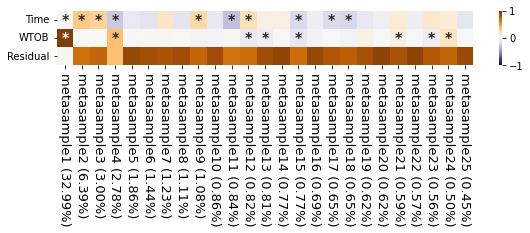

In [41]:
    pvals = AnalProtClss.ANOVA_Time_Indiv_Fasting(metasamples,ICAexplain)

 ## Display of sample independent component

/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,3))


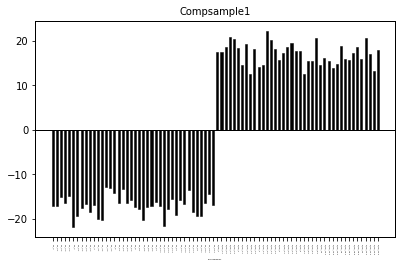

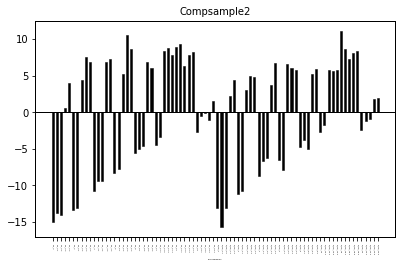

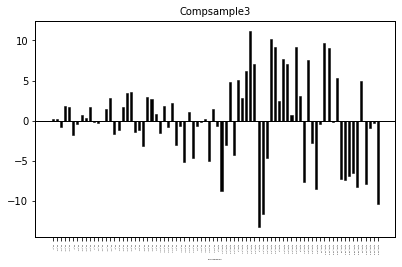

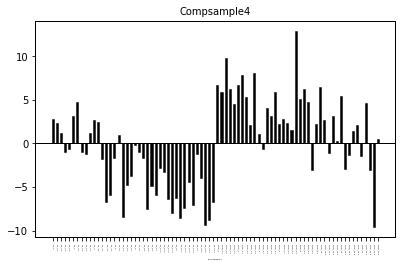

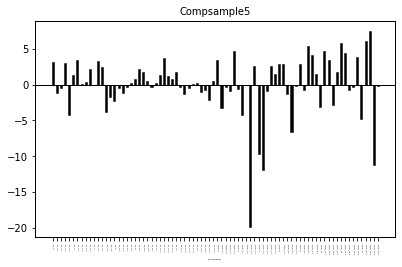

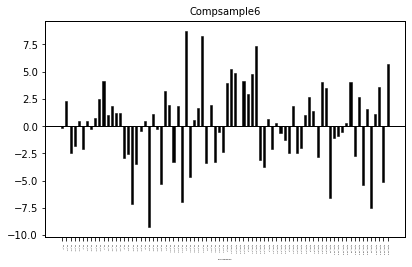

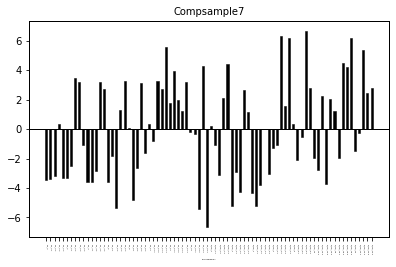

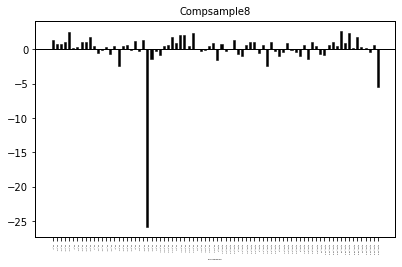

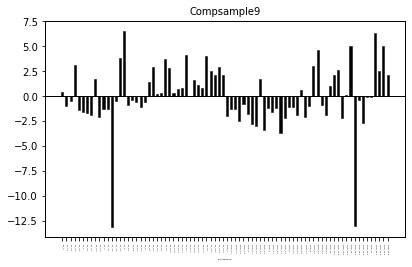

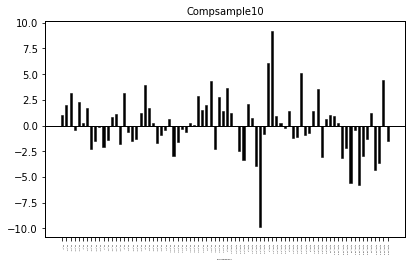

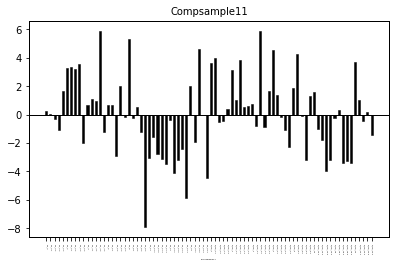

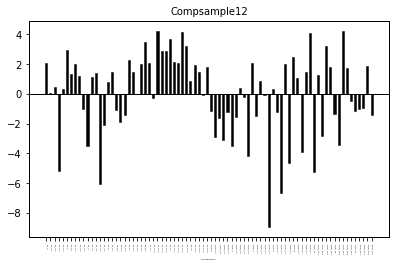

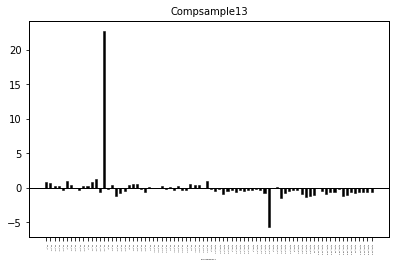

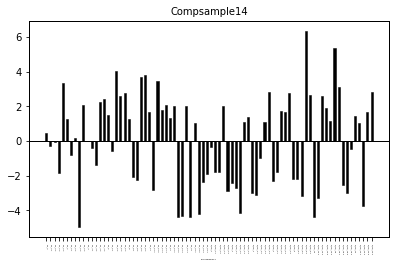

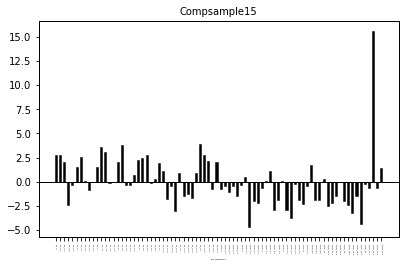

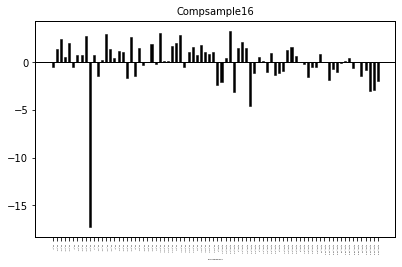

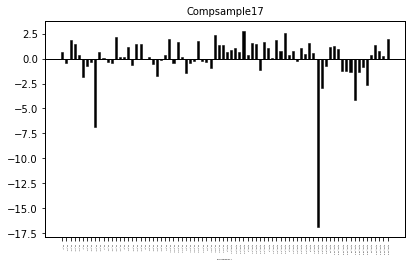

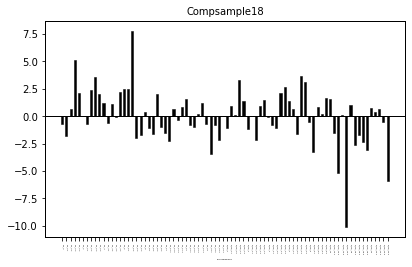

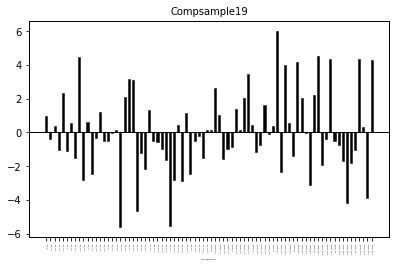

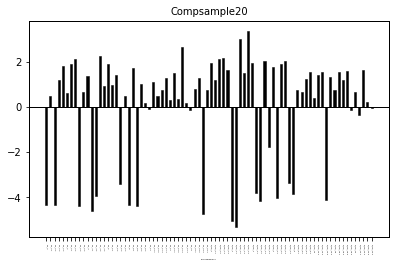

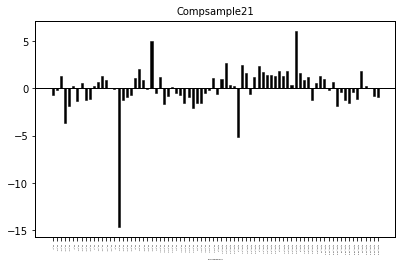

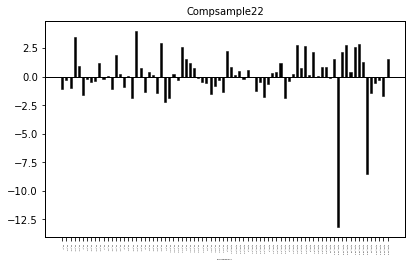

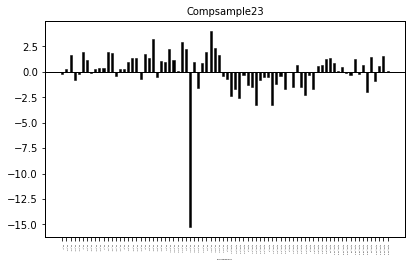

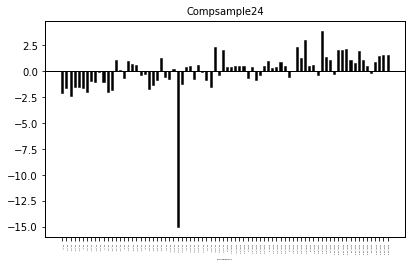

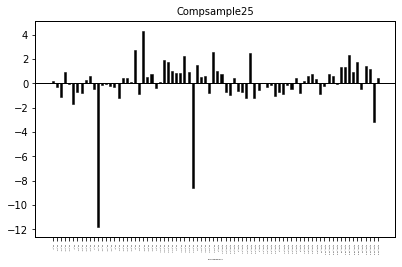

In [42]:
    AnalProtClss.Analeachcomponents(metasamples,metasamples) 

# Metabolome
## Define functions for preprocessing
- **changeshapeDF_Fastingmice()**：zscore in the sample direction, and creation of mean standard error data for each WT/OB time point

In [8]:
def changeshapeDF_Fastingmice(DF):
    def mkZscore(DF,IndLabel,ColLabel,axis):
        if axis=='col':##zscore in column direction
            ax=0
        else:##zscore in row direction
            ax=1
        meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
        stdNP = np.nanstd(np.array(DF),axis=ax)
        ZscoredDF = pd.DataFrame(index=IndLabel,columns=ColLabel)
        if axis=='col':
            for i in range(len(ColLabel)): 
                ZscoredNP = meanNP[:,i]/stdNP[i]
                ZscoredDF[ColLabel[i]] = ZscoredNP  
        else:    
            for i in range(len(IndLabel)): 
                ZscoredNP = meanNP[i,:]/stdNP[i]
                ZscoredDF.loc[IndLabel[i]] = ZscoredNP
        return(ZscoredDF) 
    timepoint=[0,2,4,6,8,12,16,24]
    condition=['WT','OB']
    #DF = DF[DF.max(axis=1)>5] ##old Threshold
    NewDF = pd.DataFrame(np.array(mkZscore(DF,list(DF.index),list(DF.columns),'row').fillna(0)) )  
    NewDF.index=list(DF.index); NewDF.columns=list(DF.columns)

    ##Organize by label
    Dict=dict() 
    for i in range(len(timepoint)*len(condition)):
        Dict[i] = DF.iloc[:,0+(5*i):5+(5*i)]
        if i==0:
            WT_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            WT_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        elif i<len(timepoint):
            WT_MeanStack = pd.concat( [WT_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            WT_SemStack = pd.concat( [WT_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)
        elif i == len(timepoint):
            OB_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            OB_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        else:
            OB_MeanStack = pd.concat( [OB_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            OB_SemStack = pd.concat( [OB_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)

    WTOBHstack_mean = np.hstack([WT_MeanStack,OB_MeanStack])  
    WTOBHstack_sem = np.hstack([WT_SemStack,OB_SemStack])  


    return(NewDF,DF,WTOBHstack_mean,WTOBHstack_sem)

## Load data

In [9]:
    ICAMetabClss = ICAHel.ICA_class()
    AnalMetabClss = AnalHel.Anal_class()
    AnalMetabClss.data='Metabolome'
    
    
    LiverMetabDF = pd.read_csv(file_dir+'/data_raw_liver.csv',header=0,index_col=0)
    NameMetabDF  = pd.read_csv(file_dir+'/sample_info_liver.csv',header=0,index_col=0)

## Data  preprocessing

In [10]:
    KEGGID = list(LiverMetabDF.index)
    MolNameDict = {key: val for key, val in zip(list(LiverMetabDF['Name']),KEGGID )}
    LiverMetabDF.index = list(LiverMetabDF['Name'])

    LiverMetabDF=LiverMetabDF.drop('Name',axis=1)
    LiverMetabDF.columns=[str(i) +'_' +str(j) for i, j in zip(NameMetabDF['MouseType'],NameMetabDF['FastingTime(h)'])]
  
    NormalizedLiverMetabDF,RawMetabDF,WTOBMetabHstack_mean,WTOBMetabHstack_sem= changeshapeDF_Fastingmice(LiverMetabDF)
    display(NormalizedLiverMetabDF)
    WTOBHMetabstack_mean=pd.DataFrame(WTOBMetabHstack_mean);WTOBMetabHstack_mean.index=list(NormalizedLiverMetabDF.index)
    WTOBHMetabstack_sem=pd.DataFrame(WTOBMetabHstack_sem);WTOBMetabHstack_sem.index=list(NormalizedLiverMetabDF.index)
    OptionMetabDict={};OptionMetabDict['std']=WTOBMetabHstack_sem

/var/folders/7t/dzktz3396j1bt0g1wr1dc7k00000gn/T/ipykernel_26127/1287239802.py:7: RuntimeWarning: Mean of empty slice
  meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/7t/dzktz3396j1bt0g1wr1dc7k00000gn/T/ipykernel_26127/1287239802.py:16: RuntimeWarning: invalid value encountered in true_divide
  ZscoredNP = meanNP[i,:]/stdNP[i]


,WT_0,WT_0,WT_0,WT_0,WT_0,WT_2,WT_2,WT_2,WT_2,WT_2,...,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24
Urea,1.031139,0.821832,0.662109,-0.026057,0.407134,-0.679479,-0.834394,-0.479995,-0.646331,0.268695,...,-0.684194,-0.836639,-0.750901,-0.486695,-1.085574,0.715302,-0.457835,-1.141954,0.274301,0.695001
Pyrazole,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3-Aminopropionitrile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Methylguanidine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Isobutylamine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NADH,1.982748,0.844059,-0.403419,0.408106,0.563161,0.418755,0.577862,1.534691,0.137917,-0.210241,...,-0.834157,-1.338853,-0.756289,-0.535971,-1.447877,-0.099113,-0.803131,-1.254763,-0.895452,-0.446394
NADP+,2.039469,0.547696,0.327501,-0.266220,-0.580484,-0.252083,-0.396313,-1.047790,-0.660701,-0.067905,...,-0.879483,-0.433810,-0.434106,-0.688065,-0.214628,0.668256,0.638710,-0.060214,-0.829987,-0.144540
FAD,2.251256,0.736487,-0.195404,0.260493,-0.130095,0.401191,0.281205,-0.409101,-0.770304,0.454009,...,-1.465754,-0.805150,-1.279392,-0.740622,-1.088528,1.363896,0.237670,-0.956589,-1.362070,-0.353832
Glycogen,1.637221,1.731011,0.964799,0.027446,1.054153,-0.681290,-0.080520,-0.885775,-0.984620,-0.362914,...,0.575274,0.100720,0.078518,0.068895,0.223170,0.659637,0.045014,0.162018,1.745173,0.264867


## Perform ICA

80 100
Getting 80 ICs * 100 times in parallel.


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarni

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

Calculating distances b/w ICs.
DBSCAN identified 53 clusters of ICs.
Orthogonality of ICs is 100.0 %


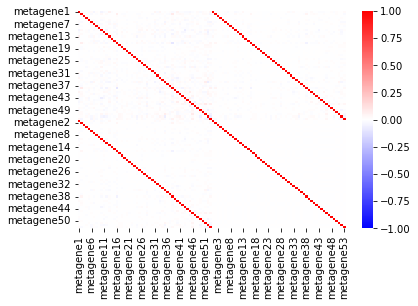

In [11]:
    # Repeat ICA (parallelization)
    num_of_rep = 100
    #Number of independent components
    k =80#100
    W,S = ICAMetabClss.robust_ica(NormalizedLiverMetabDF,k, num_of_rep)

   ## Calculate metasample, sort independent components by explanatory ratio


In [12]:
    metagenes, metasamples, ICAexplain = ICAClss.ICAsort(NormalizedLiverMetabDF, W, S)
    #metagenes.to_excel(save_dir+'MolScore.xlsx')
    #metasamples.to_excel(save_dir+'SampleScore.xlsx') 

 ## Display the explanation rate up to the calculated IC

60.11% data explained by 80 metagenes


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

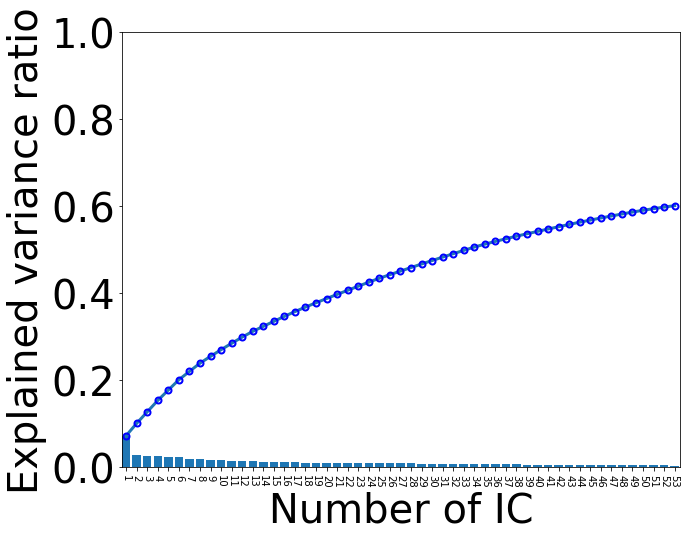

In [13]:
    print("{:.2%}".format(sum(ICAexplain)) + " data explained by " + str(k) + " metagenes")
    fig = plt.figure(figsize=(10,8))
    AnalMetabClss.plotCovRatio(ICAexplain)
    plt.xticks(size='10',rotation=270);plt.yticks(size='40')

 ## ANOVA & multiple comparison test


/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.

/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(s)


Scheffe_qvalues_Time


,0,2,4,6,8,12,16,24
metasample2_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
metasample50_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Scheffe_qvalues_WTOB


,WT,OB
metasample1_WT,1.000000e+00,1.129369e-12
metasample1_OB,1.129369e-12,1.000000e+00
metasample2_WT,1.000000e+00,2.498963e-07
metasample2_OB,2.498963e-07,1.000000e+00
metasample4_WT,1.000000e+00,1.397412e-06
metasample4_OB,1.397412e-06,1.000000e+00
metasample5_WT,1.000000e+00,6.404871e-01
metasample5_OB,6.404871e-01,1.000000e+00
metasample6_WT,1.000000e+00,4.200061e-14
metasample6_OB,4.200061e-14,1.000000e+00


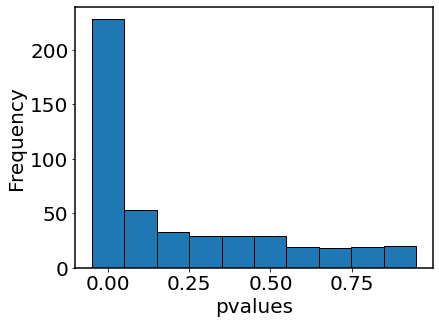

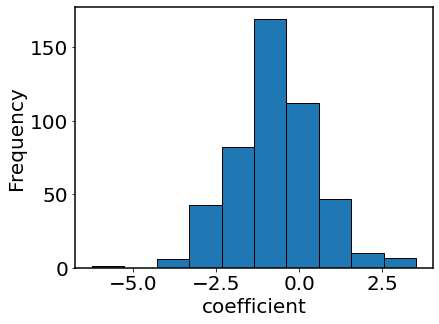

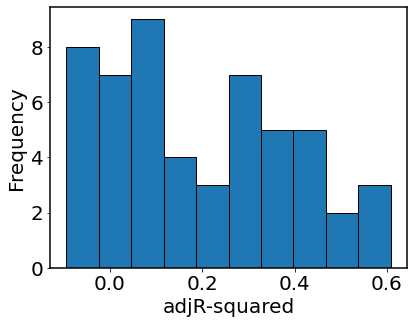

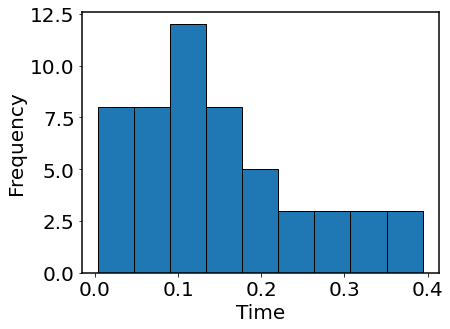

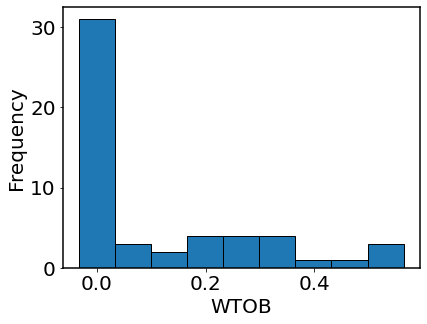

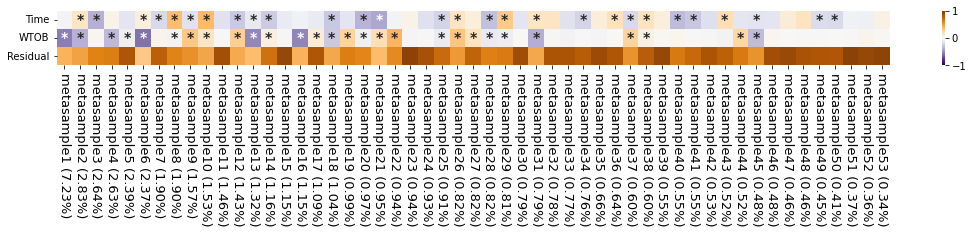

In [14]:
    pvals = AnalMetabClss.ANOVA_Time_Indiv_Fasting(metasamples,ICAexplain)

   ## Module detection and enrichment analysis using each independent component

In [15]:
    qvalcutoff=0.1
    modules = AnalMetabClss.metagenes_topBH(metagenes, qvalcutoff, MolNameDict,WTOBMetabHstack_mean, OptionMetabDict)

In [44]:
    import pyper
    # Use R
    r = pyper.R(use_numpy = 'True', use_pandas='True')   
    r('install.packages("MetaboAnalystR")')
    r('install.packages("installr")')
    r('install.packages("xlsx", dep=T)')

    r("library(MetaboAnalystR)")
    r("library(installr)")
    r("library(xlsx)")
    LiverMetabDF = pd.read_csv(file_dir+'/data_raw_liver.csv',header=0,index_col=0)

    r('DF <- read.csv("../Data/timecourse_fasting/data_raw_liver.csv")' )

    for i in range(1,len(modules)):
        r('Metabvec <- c()')
        ModuleName = 'metagene' + str(i)
        for jj in range(len(modules[ModuleName])):
            r( 'mSet<-InitDataObjects("conc", "msetora", FALSE)')
            r.assign("j", modules[ModuleName][jj])
            r('Metabvec <- append(Metabvec, DF[DF$Name==c(j),]$KEGG.ID)')

        r('cmpd.vec<- Metabvec')
        r('mSet<-Setup.MapData(mSet, cmpd.vec);')
        r('mSet<-CrossReferencing(mSet, "kegg");')
        r('mSet<-CreateMappingResultTable(mSet)')
        r('mSet<-SetMetabolomeFilter(mSet, F);')
        r('mSet<-SetCurrentMsetLib(mSet, "kegg_pathway", 2);')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_0_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_0_", "png", 72, width=NA)')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_1_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_1_", "png", 72, width=NA)')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_2_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_2_", "png", 72, width=NA)')
        r('Result<-mSet$api$ora.results')
        print(ModuleName)
        print(f'query is {modules[ModuleName]}')
        print(r('Result'))

metagene1
query is []
try({Result})
Error in try({ :  オブジェクト 'Result' がありません 

metagene2
query is ['G1P', 'G6P', 'F6P', '2-Hydroxyglutarate', '6-Phosphogluconate', 'S7P', '3-Ureidopropionate', 'Pelargonate', 'Dodecanoate']
try({Result})
                                                total expected hits    Raw p
Starch and sucrose metabolism                      18   0.1060    3 0.000112
Pentose phosphate pathway                          22   0.1300    3 0.000208
Amino sugar and nucleotide sugar metabolism        37   0.2190    3 0.001010
Glycolysis / Gluconeogenesis                       26   0.1540    2 0.009390
Galactose metabolism                               27   0.1600    2 0.010100
Neomycin, kanamycin and gentamicin biosynthesis     2   0.0118    1 0.011800
Butanoate metabolism                               15   0.0887    1 0.085500
Pentose and glucuronate interconversions           18   0.1060    1 0.102000
Pantothenate and CoA biosynthesis                  19   0.1120    1 0.

metagene8
query is ['Ala', 'GABA', 'gamma-Guanidinobutyrate', 'Thiamine', 'Glycerophosphate', '2PG', 'Lactate', '2-Hydroxyglutarate', 'Succinate', 'Glycerate', 'Threonate', 'Urate']
try({Result})
                                            total expected hits    Raw p Holm p
Butanoate metabolism                           15   0.1180    3 0.000162 0.0136
Alanine, aspartate and glutamate metabolism    28   0.2210    3 0.001100 0.0912
Glycerolipid metabolism                        16   0.1260    2 0.006430 0.5280
Arginine and proline metabolism                38   0.3000    2 0.034200 1.0000
Thiamine metabolism                             7   0.0552    1 0.054000 1.0000
Citrate cycle (TCA cycle)                      20   0.1580    1 0.147000 1.0000
Selenocompound metabolism                      20   0.1580    1 0.147000 1.0000
Pentose phosphate pathway                      22   0.1730    1 0.161000 1.0000
Pyruvate metabolism                            22   0.1730    1 0.161000 1.0000
Prop

metagene15
query is ['Spermine', 'Arg', 'N6,N6,N6-Trimethyllysine', '2,3-DPG', 'Threonate']
try({Result})
                                total expected hits   Raw p Holm p   FDR
Arginine and proline metabolism    38   0.1250    2 0.00579  0.486 0.486
Arginine biosynthesis              14   0.0460    1 0.04520  1.000 1.000
beta-Alanine metabolism            21   0.0690    1 0.06720  1.000 1.000
Lysine degradation                 25   0.0821    1 0.07960  1.000 1.000
Glycolysis / Gluconeogenesis       26   0.0854    1 0.08270  1.000 1.000
Glutathione metabolism             28   0.0920    1 0.08880  1.000 1.000
Aminoacyl-tRNA biosynthesis        48   0.1580    1 0.14800  1.000 1.000

metagene16
query is ['Choline', 'Cytosine', 'Hydroxyproline', 'Gln', 'Met', 'Xanthine', '1-Methyladenosine', 'Ru5P', '5-Oxoproline', '3-Phenylpropionate', 'N-Acetylglucosamine 1-phosphate', 'ADP-ribose']
try({Result})
                                            total expected hits   Raw p Holm p
D-Glutamine 

metagene23
query is ['4-Hydroxymethylimidazole', 'Acetyl CoA', 'dTMP', 'Isobutyryl CoA']
try({Result})
                                           total expected hits   Raw p Holm p
Valine, leucine and isoleucine degradation    40  0.07880    2 0.00199  0.167
Synthesis and degradation of ketone bodies     5  0.00986    1 0.00983  0.816
Butanoate metabolism                          15  0.02960    1 0.02930  1.000
Terpenoid backbone biosynthesis               18  0.03550    1 0.03510  1.000
Citrate cycle (TCA cycle)                     20  0.03940    1 0.03890  1.000
beta-Alanine metabolism                       21  0.04140    1 0.04090  1.000
Pyruvate metabolism                           22  0.04340    1 0.04280  1.000
Propanoate metabolism                         23  0.04530    1 0.04470  1.000
Lysine degradation                            25  0.04930    1 0.04850  1.000
Glycolysis / Gluconeogenesis                  26  0.05120    1 0.05040  1.000
Glutathione metabolism                 

metagene45
query is ['S-Methylmethionine', 'S-Lactoylglutathione']
try({Result})
                                            total expected hits   Raw p Holm p
Histidine metabolism                           16   0.0631    2 0.00152  0.127
Arginine biosynthesis                          14   0.0552    1 0.05400  1.000
Nicotinate and nicotinamide metabolism         15   0.0591    1 0.05780  1.000
Pantothenate and CoA biosynthesis              19   0.0749    1 0.07270  1.000
Citrate cycle (TCA cycle)                      20   0.0788    1 0.07640  1.000
beta-Alanine metabolism                        21   0.0828    1 0.08010  1.000
Lysine degradation                             25   0.0986    1 0.09470  1.000
Alanine, aspartate and glutamate metabolism    28   0.1100    1 0.10600  1.000
Glyoxylate and dicarboxylate metabolism        32   0.1260    1 0.12000  1.000
Glycine, serine and threonine metabolism       33   0.1300    1 0.12300  1.000
Arginine and proline metabolism                38 

 # display of sample independent component

/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:342: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,3))


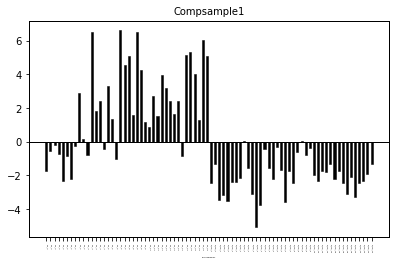

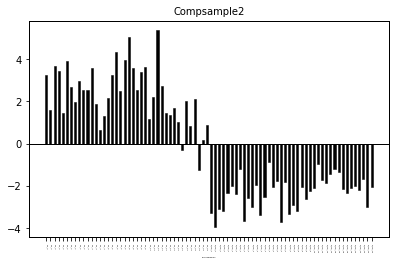

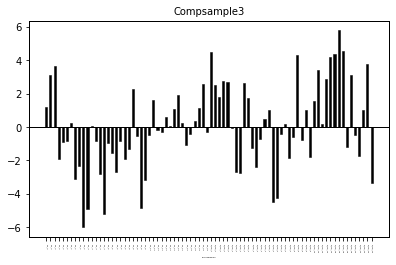

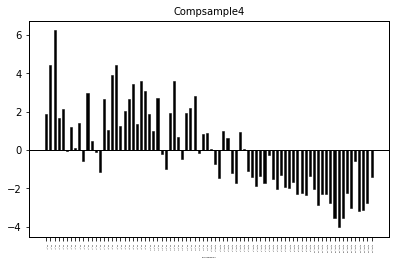

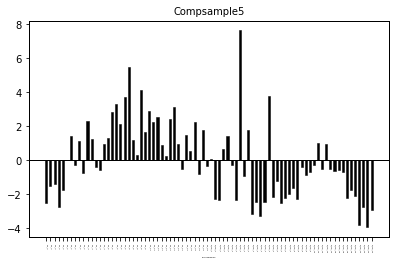

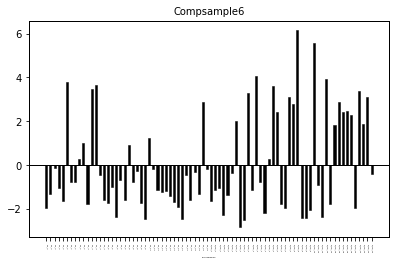

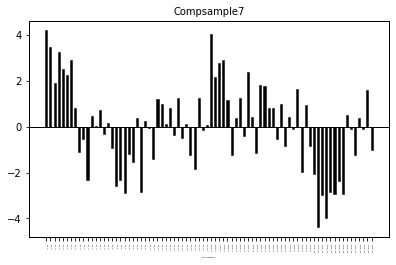

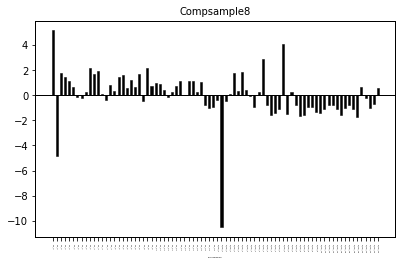

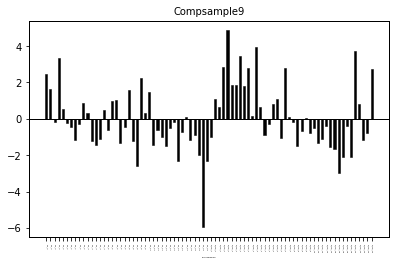

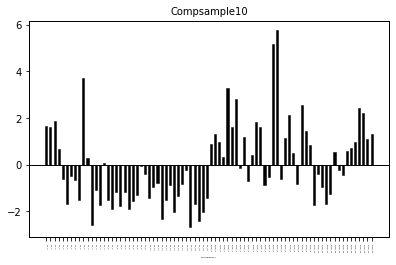

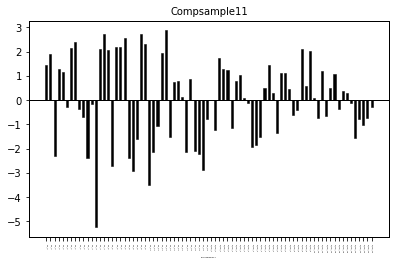

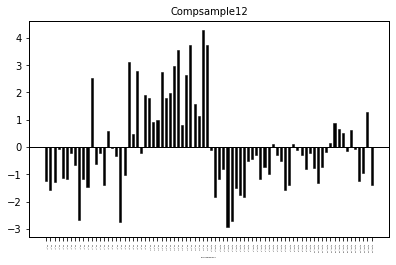

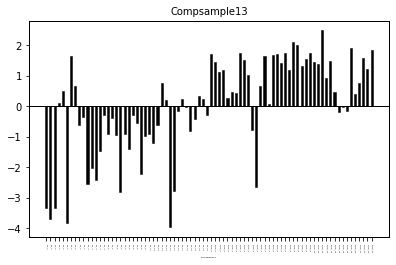

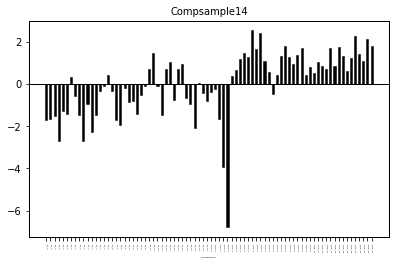

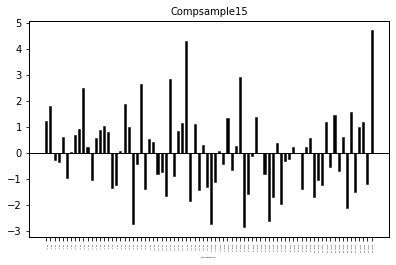

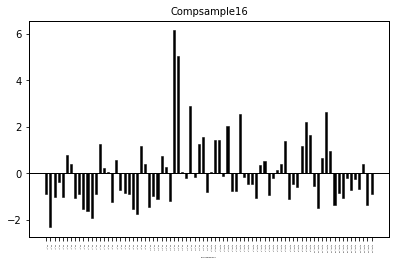

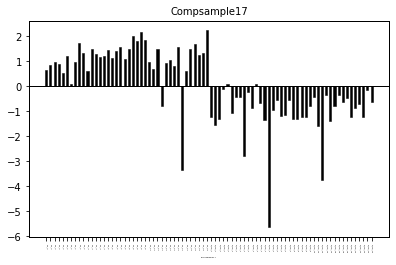

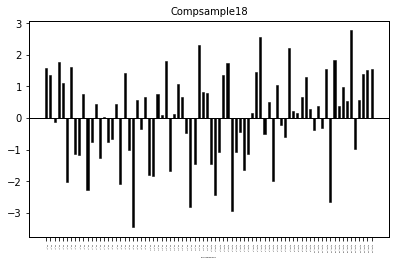

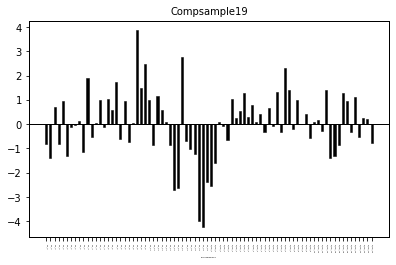

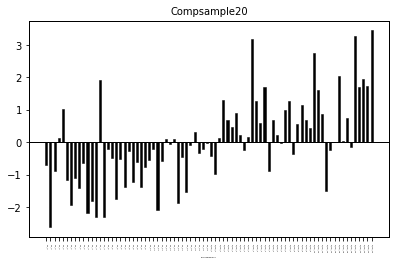

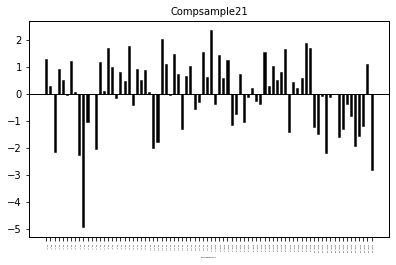

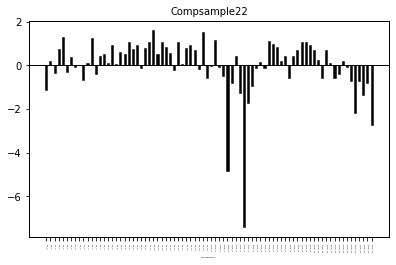

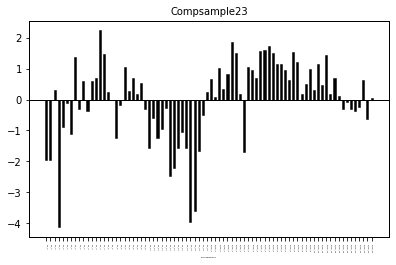

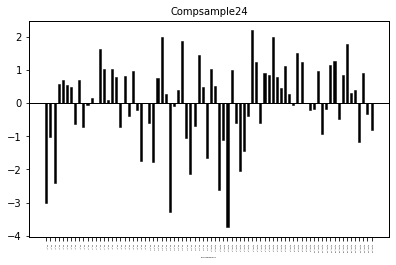

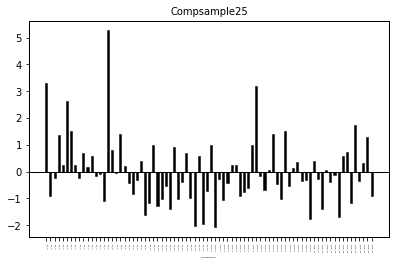

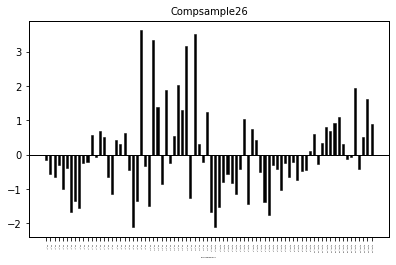

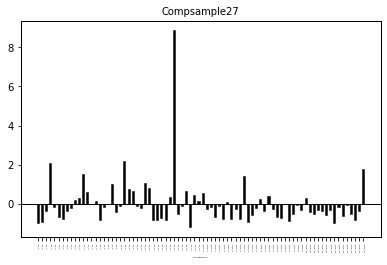

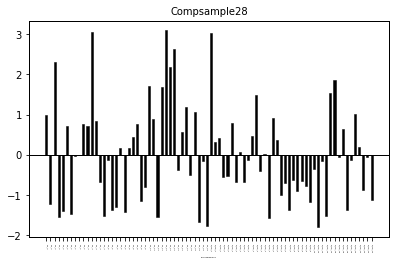

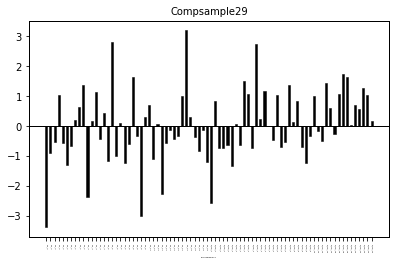

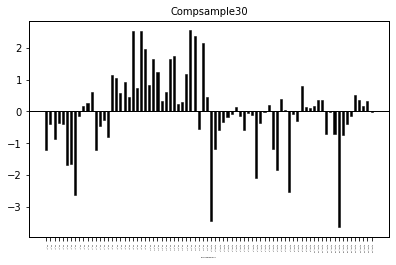

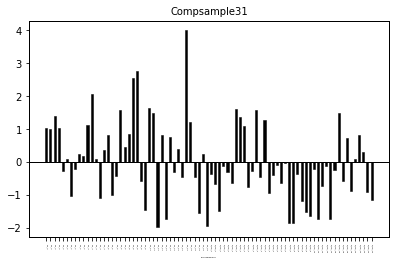

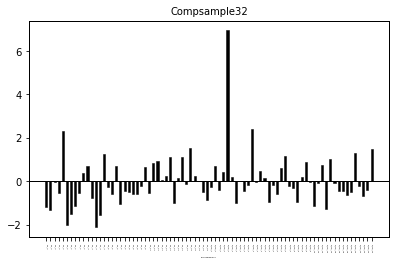

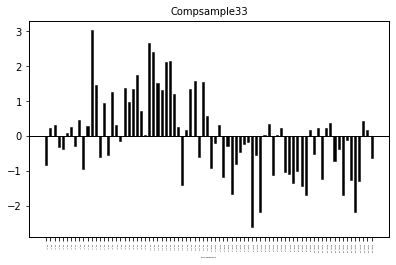

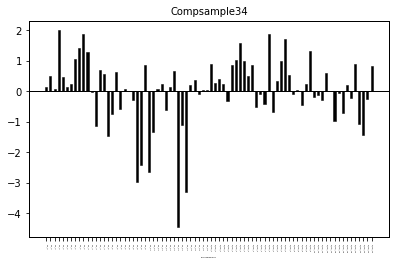

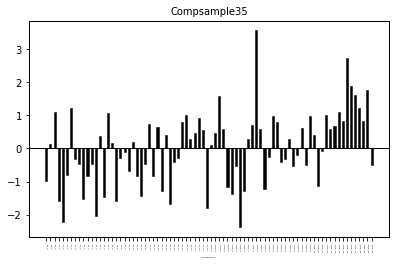

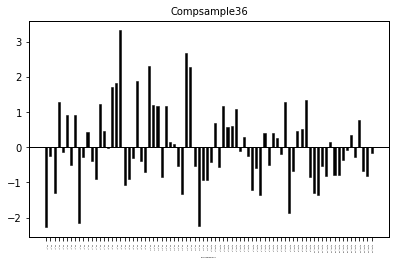

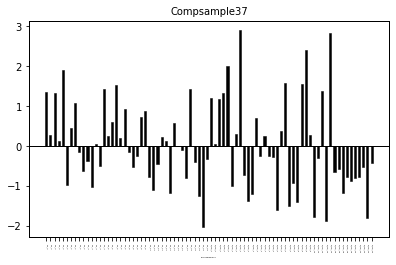

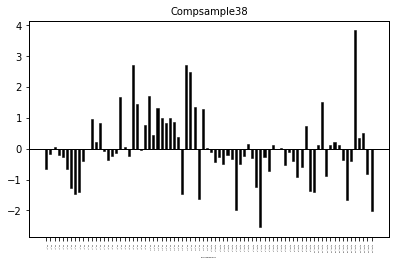

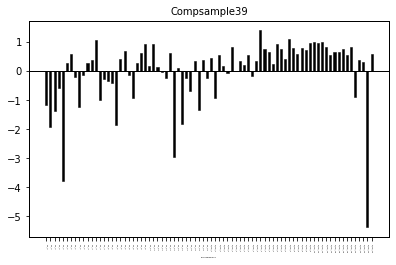

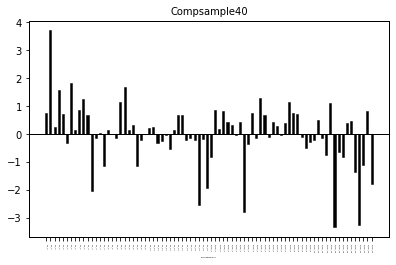

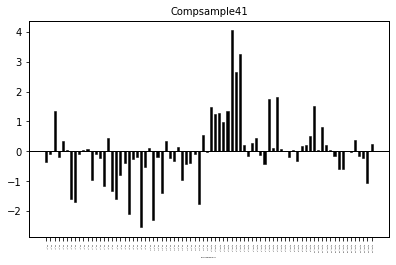

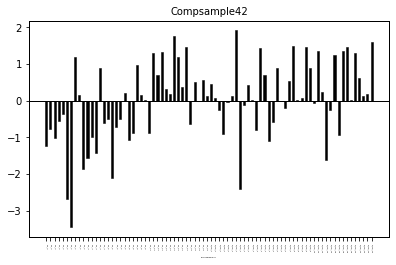

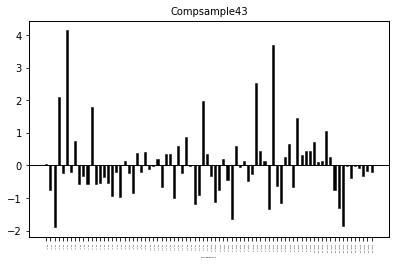

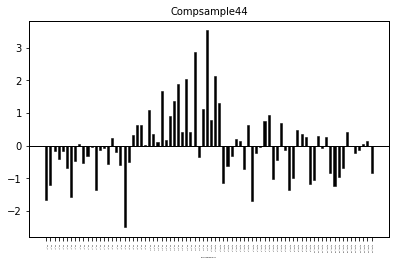

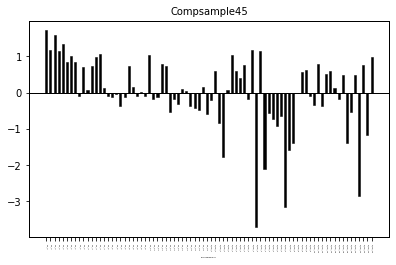

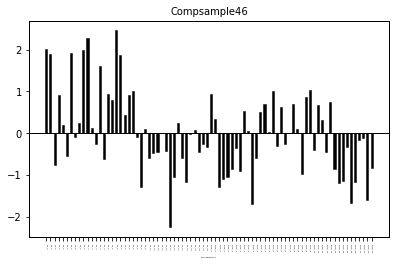

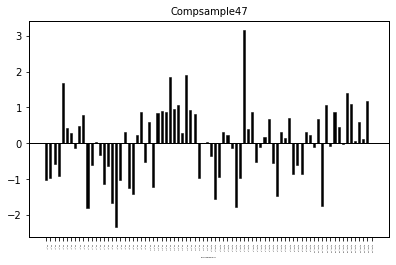

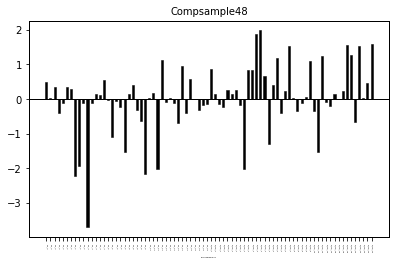

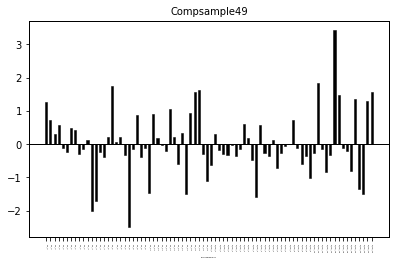

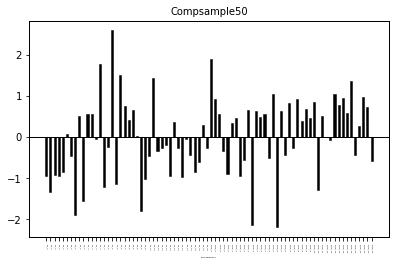

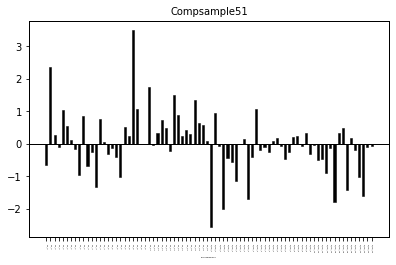

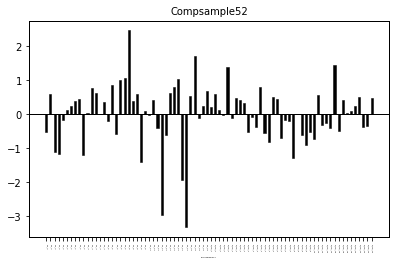

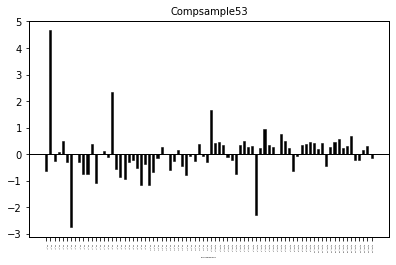

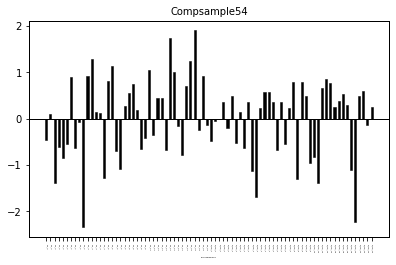

In [130]:
    AnalMetabClss.Analeachcomponents(metasamples,metasamples) 